# **PROJET 3**
#  Notebook de netoyage




 Concevoir une application au service de la sant&eacute; publique
<div>&nbsp;</div>
<div style="text-align: center;"><strong><span style="color: #0000ff;"><img src="https://upload.wikimedia.org/wikipedia/fr/0/0d/Logo_OpenClassrooms.png" alt="logo" width="133" height="133" />&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <img src="https://world.openfoodfacts.org/images/misc/openfoodfacts-logo-en-178x150.png" /></span></strong></div>


OLIVIER GUNTERN 2021



---



 
# Description de l'environement de travail.
J'utilise Colab de Google avec GoogleDrive, surtout pour la raison d'accesabilité cloud, je peux travailler depuis mon desktop,
mon labtop ou même depuis mont téléphone quand une idée me passe par la tête.



---


Montage de GoogleDrive

Import des bibliothèques

In [1]:
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
 
import missingno as msno
import numpy as np
 
import os
 
 
#pour la sauvegarde est restauration de variable
from sklearn.externals import joblib

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from google.colab import files
 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
 
#règle quelques soucis d'affichage des graphiques 
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

FONCTIONS PERSONELLES

In [3]:
## Fonctions
 
###Fonction valmanque, paramètre (dataframe, pourcent,1 ou 0)
###Imprime les colonnes avec le nombre de ligne avec valeurs ainsi que le pourcentage sans valeurs
###puis retourne une liste contenant les nom de colonnes ayant un pourcentage inférieur a la valeur transmise.
### retourne aussi le nombre de lignes non nulles correspondant à la colonne ValNa
 
def valmanque(df,perct,imp):
  # recherche des valeurs manquantes
  NutriColonne=df.columns.values
  ListeNaN=[]
  ValNaN=df.isna().sum()
  #nb Lignes
  LigneNonNull=[]
  NbLignes=len(df)
  if imp == 1:
    print("nombre de lignes :",NbLignes)
    print("nombre de ligne contenant des valeurs nul:")
    print(ValNaN)
    print()
    print("données par ligne après supression des valeurs null")
 
  i=0
  i2=0
  while i< len(df.columns):
    LigneNonNull.append(NbLignes-ValNaN[i])
 
    if imp == 1 and (ValNaN[i]*100/NbLignes)>=perct:
        print('-----------------------------------------')
        print(NutriColonne[i])
        print(NbLignes-ValNaN[i],' nombres de lignes remplies')
        print(ValNaN[i]*100/NbLignes,' % vide')
    
    if (ValNaN[i]*100/NbLignes)>=perct:
      ListeNaN.append(NutriColonne[i])
      i2=i2+1
    i=i+1
  print(i2,'sur',i,'variable avec plus de ',perct, 'pourcent de valeurs manquantes')
  return(ListeNaN)
 
#fonction donnant des données staistiques de bases en indiquant un dataframe et une liste de  noms de colonnes
#retourne graphiques de corrélations et un tableau de résultat
 
def Analyse_1(df,Var):  
  # Analyse statistique de base (describe fait pareil,mais je voulais ma version...)
  #création du dataframe
  Resume = pd.DataFrame(columns=['minimum','maximum','somme','moyenne','médiane','mode,','varianceVar','varianceStd'])
 
  for bcl in Var:
   
   mini=(df[bcl].min())
   
   maxi=(df[bcl].max())
 
   total=(df[bcl].sum())
  
   moy=(df[bcl].mean())
   
   mediane=(df[bcl].median())
  
   Modee=(df[bcl].mode())
   
   Varr=(df[bcl].var(ddof=0))
  
   Stdd=(df[bcl].std(ddof=0))
   
   #création du dataframe de résultat  'ajout row'
   df_new_row = pd.DataFrame(data=np.array([[mini,maxi,total,moy,mediane,Modee,Varr,Stdd]]), columns=['minimum','maximum','somme','moyenne','médiane','mode,','varianceVar','varianceStd'])
   Resume = pd.concat([Resume,df_new_row], ignore_index=True)
 
   plt.plot(df[bcl])
   plt.show()
  insert_index = 0
  insert_colname = 'Nom'
  insert_values = Var # this can be a numpy array too
  Resume.insert(loc=insert_index, column=insert_colname, value=insert_values)
  return(Resume)
 
# Fonction créant un graphique de corellation en indiquant du dataframe et le nom de l'indicateur
def correl(df,indicateur):
 
  Nutricorr=df.corr(method=indicateur)
  plt.figure(figsize = (16,5))
 
  sns.heatmap(Nutricorr, 
            xticklabels=Nutricorr.columns,
            yticklabels=Nutricorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1)

Nous avons sur le site une description du Dataset 
https://static.openfoodfacts.org/data/data-fields.txt

 This file describes the fields from the CSV export of the products in the Open Food Facts database.
See https://world.openfoodfacts.org/data for more information.



Chargement du fichier

In [4]:

# Vérifier si le fichier existe ou non sur colab

if 'Nutr' in locals():

    
    print("dataframe existe dans la cession Colaboratory execution de la suite du code")
else:
    print("dataframe non trouvé")
    #chargement du dataframe principal
    print("Chargement du fichier en.openfoodfacts.org.products.csv depuis drive/MyDrive/P3/data/ vers colab sous variable Nutr")
    #donne l'accès à google drive
 
    from google.colab import drive
    drive.mount('/content/drive')
    Nutr = pd.read_csv('drive/MyDrive/P3/data/en.openfoodfacts.org.products.csv', sep='\t')

dataframe non trouvé
Chargement du fichier en.openfoodfacts.org.products.csv depuis drive/MyDrive/P3/data/ vers colab sous variable Nutr
Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,52,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Nutri=Nutr.copy()

In [6]:
print ("Le dataset compte {} lignes et {} variables".format(Nutri.shape[0], Nutri.shape[1]))

Le dataset compte 1895924 lignes et 186 variables


In [7]:
Nutri.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.895924e+06,1.895924e+06,0.0,0.0,4.840920e+05,0.0,706541.000000,0.0,706541.000000,0.0,706541.000000,0.0,696711.000000,617540.000000,459161.000000,1.366550e+05,1.453838e+06,1.506083e+06,973.000000,1.498124e+06,1.455121e+06,31.000000,5.000000,6.000000,11.000000,20.000000,16.000000,31.000000,1.500000e+01,101.000000,38.000000,12.000000,14.000000,2.200000e+01,14.000000,47826.000000,47797.000000,2037.000000,750.000000,123.000000,...,8475.000000,1.285800e+04,1181.000000,6155.000000,149.000000,423.000000,92128.000000,790.000000,270495.000000,13897.000000,264949.000000,14777.000000,10262.000000,4326.000000,4090.000000,389.000000,2539.000000,206.000000,310.000000,2272.000000,467.000000,193.000000,197.000000,8795.000000,374.000000,11813.000000,314.000000,6096.000000,5.000000,475.00000,11741.000000,696716.000000,9.000000,4.000000,1.0,62.000000,1712.000000,36.000000,66.000000,39.000000
mean,1.556600e+09,1.591567e+09,NaN,NaN,2.295256e+16,NaN,2.038621,NaN,0.020525,NaN,0.070622,NaN,9.119668,3.428110,43.846971,4.877655e+37,6.041225e+06,4.425758e+36,354.536588,1.382302e+01,5.113388e+00,0.143439,9.678010,21.568867,4.721909,30.037595,19.199438,86.215159,3.438387e+01,18.288676,6.522272,26.247212,1.648041,2.514472e+01,4.202594,9.938845,5.903255,19.050415,2.591629,1.541148,...,0.026415,2.375179e-02,0.384251,0.301123,1.102207,4.297385,0.451484,0.228184,0.188856,0.718041,0.014922,3.383325,0.045596,0.042842,0.007268,0.374494,0.097240,324.254818,0.888616,2.266174,2.369144,3.305178,6.478319,34.111718,17.773744,46.593410,15.126854,52.271464,1.229430,262.79151,617.948650,9.119725,12.333333,34.175000,9100.0,1.097102,0.068921,3.321389,1.165422,0.025676
std,5.180695e+07,2.999412e+07,NaN,NaN,1.596958e+19,NaN,2.909039,NaN,0.143712,NaN,0.304627,NaN,8.856618,0.967791,25.923229,1.803117e+40,7.210692e+09,5.431404e+39,555.207183,8.822946e+01,9.308576e+00,0.262234,21.423183,38.203309,9.165385,52.954027,44.392654,448.141066,1.090644e+02,118.279510,32.573771,72.610384,4.827629,9.742610e+01,10.105732,16.549564,10.595712,651.736804,13.003601,8.424148,...,1.859685,8.223952e-01,4.321199,13.370997,12.289644,51.274333,7.807996,2.138573,5.499595,13.446171,2.095217,365.312851,1.469963,1.465573,0.114642,5.085118,1.615387,4644.871552,4.551562,67.260689,24.377002,29.239625,2.374312,36.461854,31.809823,28.688324,5.889855,22.666616,0.808762,754.00754,6114.595354,8.856621,10.222524,15.620153,NaN,7.875402,1.826776,1.593975,9.228266,0.090002
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,0.000000,

LISTE DES VARIABLES

In [8]:
print(Nutri.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'abbreviated_product_name'
 'generic_name' 'quantity' 'packaging' 'packaging_tags' 'packaging_text'
 'brands' 'brands_tags' 'categories' 'categories_tags' 'categories_en'
 'origins' 'origins_tags' 'origins_en' 'manufacturing_places'
 'manufacturing_places_tags' 'labels' 'labels_tags' 'labels_en'
 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo' 'cities'
 'cities_tags' 'purchase_places' 'stores' 'countries' 'countries_tags'
 'countries_en' 'ingredients_text' 'allergens' 'allergens_en' 'traces'
 'traces_tags' 'traces_en' 'serving_size' 'serving_quantity'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutriscore_score'
 'n

In [9]:
#examen rapide des catégories

print(Nutri['categories'].unique())

[nan 'Epicerie, Condiments, Sauces, Moutardes' 'Xsf' ...
 'Extrudált Kukorica' 'Vinaigres, Sèves de bouleau'
 'Kekse und Kuchen, Kuchen, Tiefkühl-Kuchen']


In [10]:
print(Nutri['categories_tags'].unique())

[nan 'en:groceries,en:condiments,en:sauces,en:mustards' 'fr:xsf' ...
 'hu:extrudált-kukorica' 'en:vinegars,fr:seves-de-bouleau'
 'en:biscuits-and-cakes,en:cakes,de:tiefkühl-kuchen']


In [11]:
 print(Nutri['categories'].nunique() )

102505


102505 ??

In [12]:
 print(Nutri['countries'].unique() )

['en:france' 'France' 'Espagne' ... 'en:TD' 'Republik Kongo'
 'Bulgaria,Cyprus,Czech Republic,Greece']


 Nous gardons les données entrées en France

In [13]:
Nutri=Nutri[Nutri['countries']=='France']

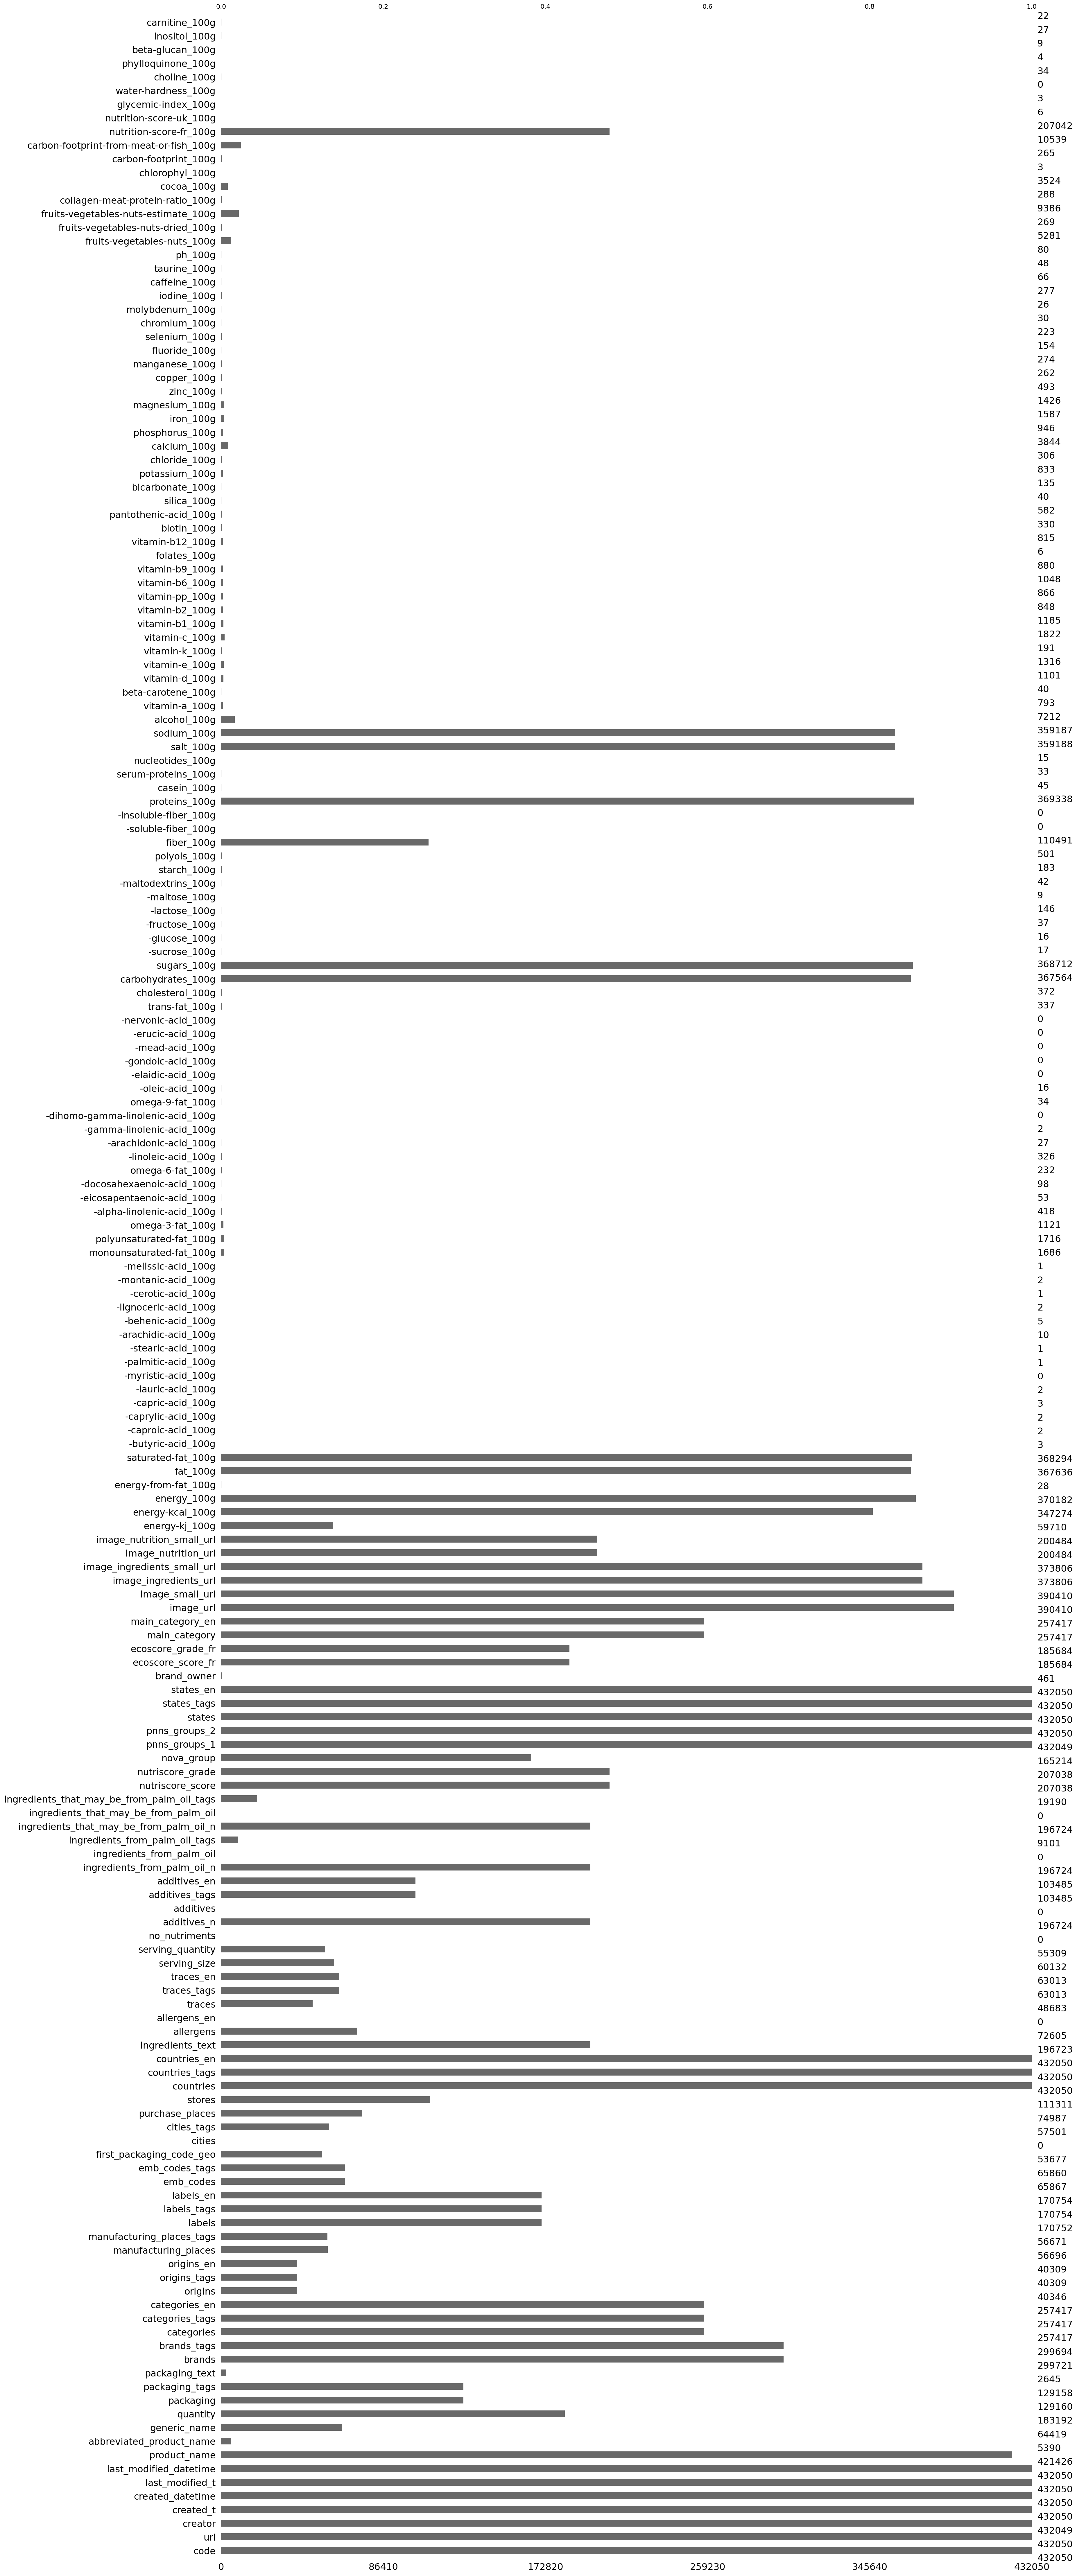

In [14]:

#valeur manquantes
msno.bar(Nutri)

 Très grand nombre de valeurs manquantes

# Idée d'application :
## **Application ciblée sur une consommation journalière équilibrée en 'bonne graisse'**

# Nutriscore non satisfaisant
Notre problématique est en premier lieu de savoir si la base de donée, remplie par des volontaires est fiable, pour faire un nutriscore répondant au critiques de l'actuel nutriscore.

**Un des gros problème du nutriscore c'est sont manque d'information sur les huiles ainsi que les sucres**


# Un exemple d'article

Le mode de production, le degré de transformation ou de destruction de la matrice d’un aliment, ce qui influence pourtant variablement le métabolisme,
La qualité des graisses saturées qui toutes ne se valent pas, de même que les acides gras trans ne sont sont ils correctement spécifié dans la base ?
La différence entre les huiles à teneur variable en oméga-6 et oméga-3 ou le ratio entre les deux, alors que toutes les huiles ne génèrent pas les mêmes effets (inflammation/régénération) selon leur profil d’acides gras, équilibré ou pas, ce qui tend à pénaliser les aliments sources de « bonnes » graisses,
Source : https://www.alternativesante.fr/alimentation/alimentation-saine-a-quels-indices-et-applications-se-fier
---
Nous allons profiter pour étudier toutes les sources de gras et les différents sucres pour créer un Nutriscore orienté précisément sur les matières grasse.

Recherche des colonnes contenant au moins 99 % de valeur manquantes avec la fonction valmanque

# Malheureusement beaucoup de ces données sont vides dont les Oméga, et tristesse et désepoire les sucres sont aussi vide....nous allons voir si nous pouvons tirer quelque chose des informations sur les acides gras (constituants des graisses) pour le sucre, le glucose n'est contenu que  dans 95 produits celà semble abbérant, visiblement tout est rassemblé sous sugar....


## Effectivement par exemple l'huile d'olive extra vierge sur le site openfood :
# Détail de l'analyse des ingrédients »

Huile d'olive de catégorie supérieure obtenue directement des olives et uniquement par des procédés mécaniques

Huile d'olive de catégorie supérieure obtenue directement des olives et uniquement par des procédés mécaniques -> en:extra-virgin-olive-oil - vegan: yes - vegetarian: yes - from_palm_oil: no - percent_min: 100 - percent_max: 100



Nous avons bien les graisses et les graisses saturées mais les acides gras ne sont vides ainsi que les omega ce qui est vraiment etrange
nous allons nous en assurer sur le site

Équilibre oméga-3 - oméga-6 dans l'alimentation
L'AFSSA4 recommande un ratio de un acide α-linolénique (le précurseur de la famille des oméga-3) pour cinq acide linoléique (le précurseur de la famille des oméga-6). En Amérique du Nord, le ratio Oméga-3/Oméga-6 recommandé varie entre 2:1 et 1:1. Ce ratio est très différent d'une agence à l'autre dans le monde. Ces différences dépendent en partie de la population choisie comme référence. Par exemple, les Inuits consommeraient 3 fois plus d'oméga-3 que d'oméga-6, alors que pour les Japonais c'est exactement l'inverse[réf. nécessaire]. Ces deux populations sont connues pour présenter moins de cancers et de maladies cardiovasculaires que la plupart des pays développés[réf. nécessaire].


L’Autorité Européenne de Sécurité des Aliments (EFSA) dans un avis d'experts de 20047 reconnaît que « les acides gras insaturés trans augmentent le risque de maladie cardiaque et souligne la nécessité de n’en consommer que de faibles quantités, quelles que soient leurs origines. La suppression ou la réduction des acides gras insaturés trans dans de nombreux produits alimentaires doit se poursuivre. Chaque fois que cela est possible, ils doivent être remplacés de préférence par des acides gras insaturés cis plutôt que par des acides gras saturés ».

# ***Flou autour des définitions***

## Nous nous atendions à quelque choses comme sur la bas des USA FoodData Central
https://fdc.nal.usda.gov/


In [15]:
oil = pd.read_excel ('drive/MyDrive/P3/data/usadb.xlsx')

In [16]:
oil

,Name,Average Amount,Unit,Deriv. By,n,Samples,Min,Max,Median,Footnote,Initial Year Acquired,Unnamed: 11
0,Proximates:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total fat (NLEA),93.700,g,Summed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lipids:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Fatty acids, total saturated",15.400,g,Analytical,36.0,Samples,13.100,18.800,15.300,NaN,2019.0,NaN
4,SFA 14:0,0.013,g,Analytical,36.0,Samples,0.009,0.021,0.012,NaN,2019.0,NaN
5,SFA 15:0,0.006,g,Analytical,36.0,Samples,0.004,0.012,0.006,NaN,2019.0,NaN
6,SFA 16:0,12.100,g,Analytical,36.0,Samples,9.480,15.800,12.000,NaN,2019.0,NaN
7,SFA 17:0,0.081,g,Analytical,36.0,Samples,0.038,0.148,0.078,NaN,2019.0,NaN
8,SFA 18:0,2.590,g,Analytical,36.0,Samples,1.870,3.160,2.620,NaN,2019.0,NaN
9,SFA 20:0,0.411,g,Analytical,36.0,Samples,0.379,0.472,0.406,NaN,2019.0,NaN


https://www.vidal.fr/sante/nutrition/corps-aliments/lipides-energie/acides-gras-satures-insatures-trans.html

ACIDES GRAS MONO-INSATURÉS ET POLYINSATURÉS
Les acides gras mono-insaturés (oméga-9) et les acides gras polyinsaturés (oméga-3 et oméga-6) ont tendance à protéger des maladies cardiovasculaires. Ils sont essentiellement présents dans les produits végétaux ou les poissons gras tels que sardine, hareng, thon ou saumon. Ces acides gras devraient constituer l’essentiel de l’apport quotidien en lipides. Néanmoins, ils sont tout aussi caloriques que les acides gras saturés.

<font color='blue'  size="+4">Cleaning</font>

In [17]:
#utilisation de ma fonction valmanque pour les valeurs manquantes (à plus de 99%)
ColRest=valmanque(Nutri,99,1)

nombre de lignes : 432050
nombre de ligne contenant des valeurs nul:
code                       0
url                        0
creator                    1
created_t                  0
created_datetime           0
                       ...  
choline_100g          432016
phylloquinone_100g    432046
beta-glucan_100g      432041
inositol_100g         432023
carnitine_100g        432028
Length: 186, dtype: int64

données par ligne après supression des valeurs null
-----------------------------------------
packaging_text
2645  nombres de lignes remplies
99.38780233769239  % vide
-----------------------------------------
cities
0  nombres de lignes remplies
100.0  % vide
-----------------------------------------
allergens_en
0  nombres de lignes remplies
100.0  % vide
-----------------------------------------
no_nutriments
0  nombres de lignes remplies
100.0  % vide
-----------------------------------------
additives
0  nombres de lignes remplies
100.0  % vide
-----------------------------

In [18]:
ColRest

['packaging_text',
 'cities',
 'allergens_en',
 'no_nutriments',
 'additives',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'brand_owner',
 'energy-from-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'trans-fa

In [19]:
# Nous utilisons les valeurs de la liste de colonne retournée par la fonction valmanque pour suprimmer les colonne contenant
#au moins 99 % de valeurs manquantes MAIS NOUS GARDONS LES ACIDES GRAS OMEGA
Dropp=['abbreviated_product_name',
 'packaging_text',
 'cities',
 'allergens_en',
 'no_nutriments',
 'additives',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil',
 'energy-from-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'chloride_100g',
 'phosphorus_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g',
 'cocoa_100g',
 'chlorophyl_100g',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g',
 'water-hardness_100g',
 'choline_100g',
 'phylloquinone_100g',
 'beta-glucan_100g',
 'inositol_100g',
 'carnitine_100g']
Nutri= Nutri.drop(labels=Dropp, axis=1)

Supression de variables inutiles pour notre application








In [20]:
print(Nutri.columns.values)

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags' 'origins_en'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities_tags' 'purchase_places' 'stores' 'countries' 'countries_tags'
 'countries_en' 'ingredients_text' 'allergens' 'traces' 'traces_tags'
 'traces_en' 'serving_size' 'serving_quantity' 'additives_n'
 'additives_tags' 'additives_en' 'ingredients_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutriscore_score'
 'nutriscore_grade' 'nova_group' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 'states_en' 'brand_owner' 'ecoscore_score_fr'
 'ecoscore_grade_fr' 'main_category' 'main_category_en' 'image_url'
 

20 occurences les plus représentées dans les variables

In [21]:
dropp=['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'brand_owner', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'main_category_en', 'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'energy-kj_100g',  'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'alcohol_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'potassium_100g', 'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g']

In [22]:
 
 
Nutri= Nutri.drop(dropp, axis=1)

In [23]:
Nutri.shape

(432050, 22)

In [24]:
print(Nutri.columns.values)

['product_name' 'generic_name' 'categories' 'countries'
 'ingredients_from_palm_oil_n' 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutriscore_score'
 'nutriscore_grade' 'energy-kcal_100g' 'energy_100g' 'fat_100g'
 'saturated-fat_100g' 'monounsaturated-fat_100g'
 'polyunsaturated-fat_100g' 'omega-3-fat_100g' 'omega-6-fat_100g'
 'omega-9-fat_100g' 'trans-fat_100g' 'cholesterol_100g'
 'carbohydrates_100g' 'sugars_100g']


## encore une supression de variables inutiles pour notre application


In [25]:
dropp=['product_name', 'generic_name', 'categories', 'countries', 'ingredients_from_palm_oil_n' ,'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags' , 'energy_100g','carbohydrates_100g', 'sugars_100g','generic_name','energy-kcal_100g' , 'nutriscore_grade','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags','nutriscore_score','carbohydrates_100g', 'sugars_100g',
 'nutriscore_grade' ,'energy-kcal_100g','energy_100g' ]

In [26]:
Nutri=Nutri.drop(labels=dropp, axis=1)

In [27]:
Nutri.shape

(432050, 9)

In [28]:
print(Nutri.columns.values)

['fat_100g' 'saturated-fat_100g' 'monounsaturated-fat_100g'
 'polyunsaturated-fat_100g' 'omega-3-fat_100g' 'omega-6-fat_100g'
 'omega-9-fat_100g' 'trans-fat_100g' 'cholesterol_100g']


In [29]:
Nutri1=Nutri.copy()

20 occurences les plus représentées (pas trop utiles mais juste pour l'apprentissage)

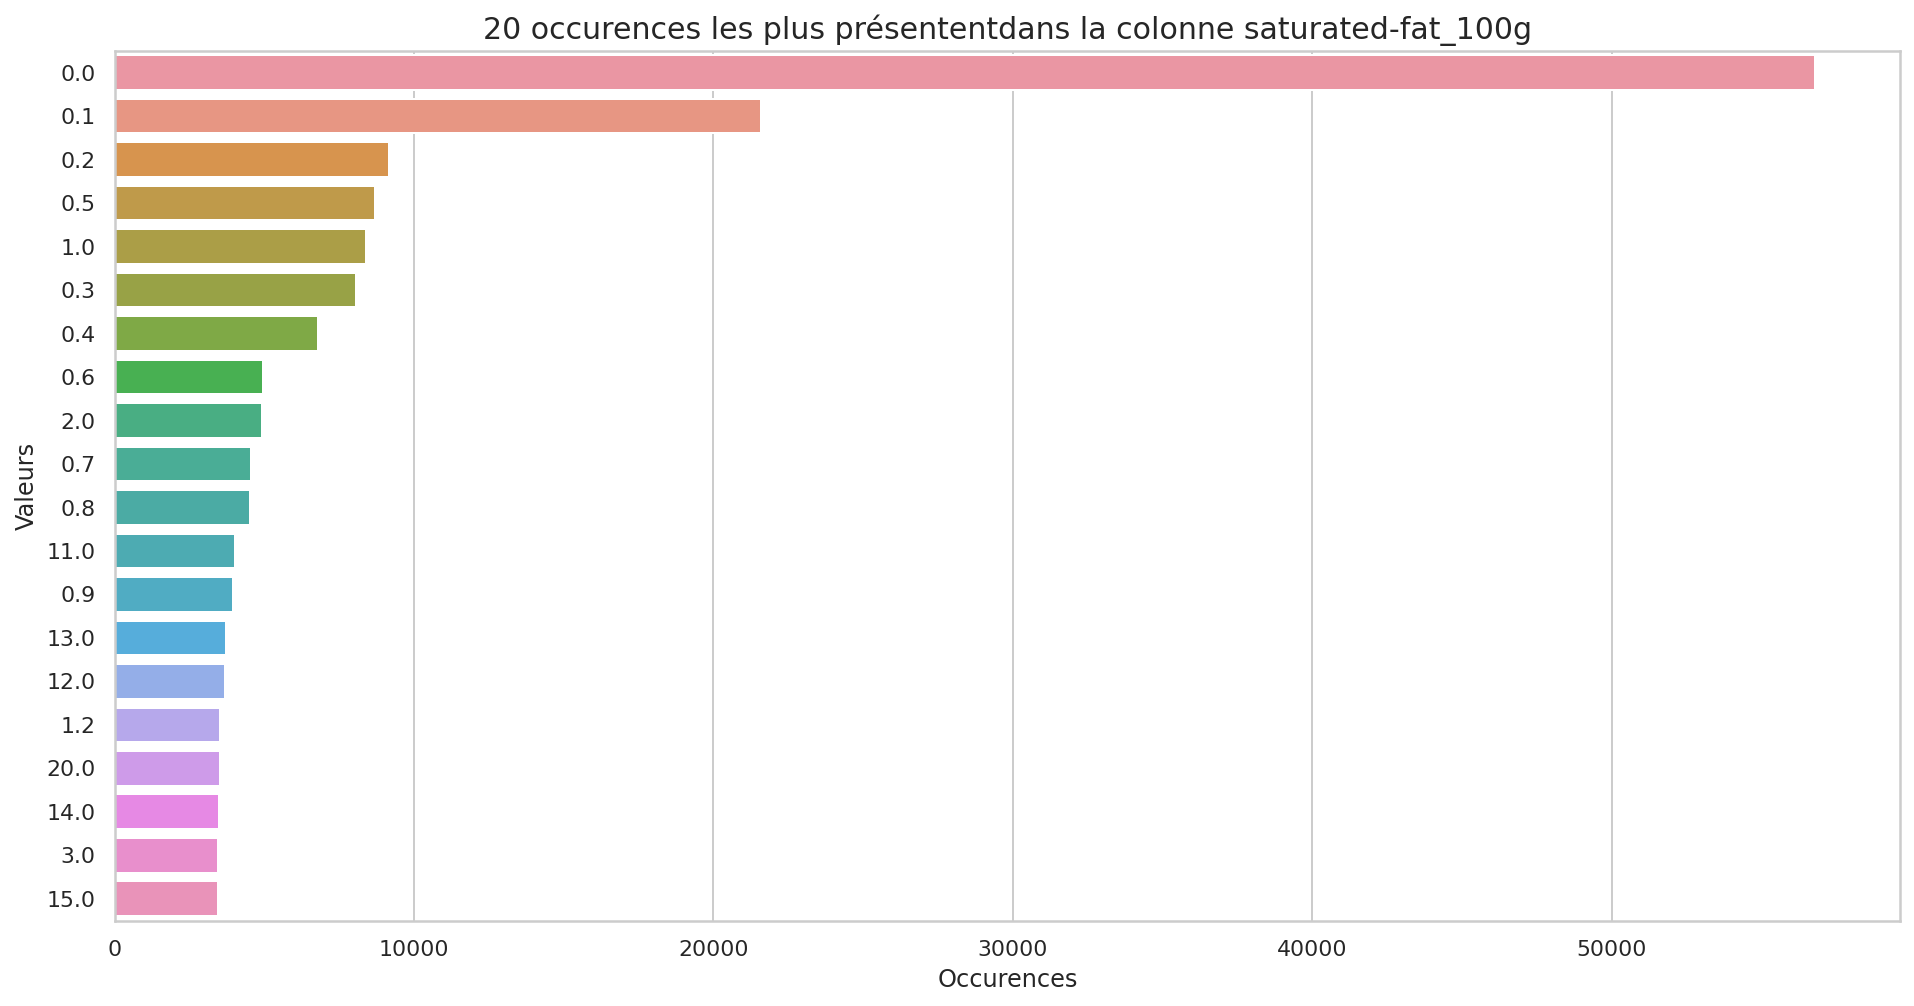

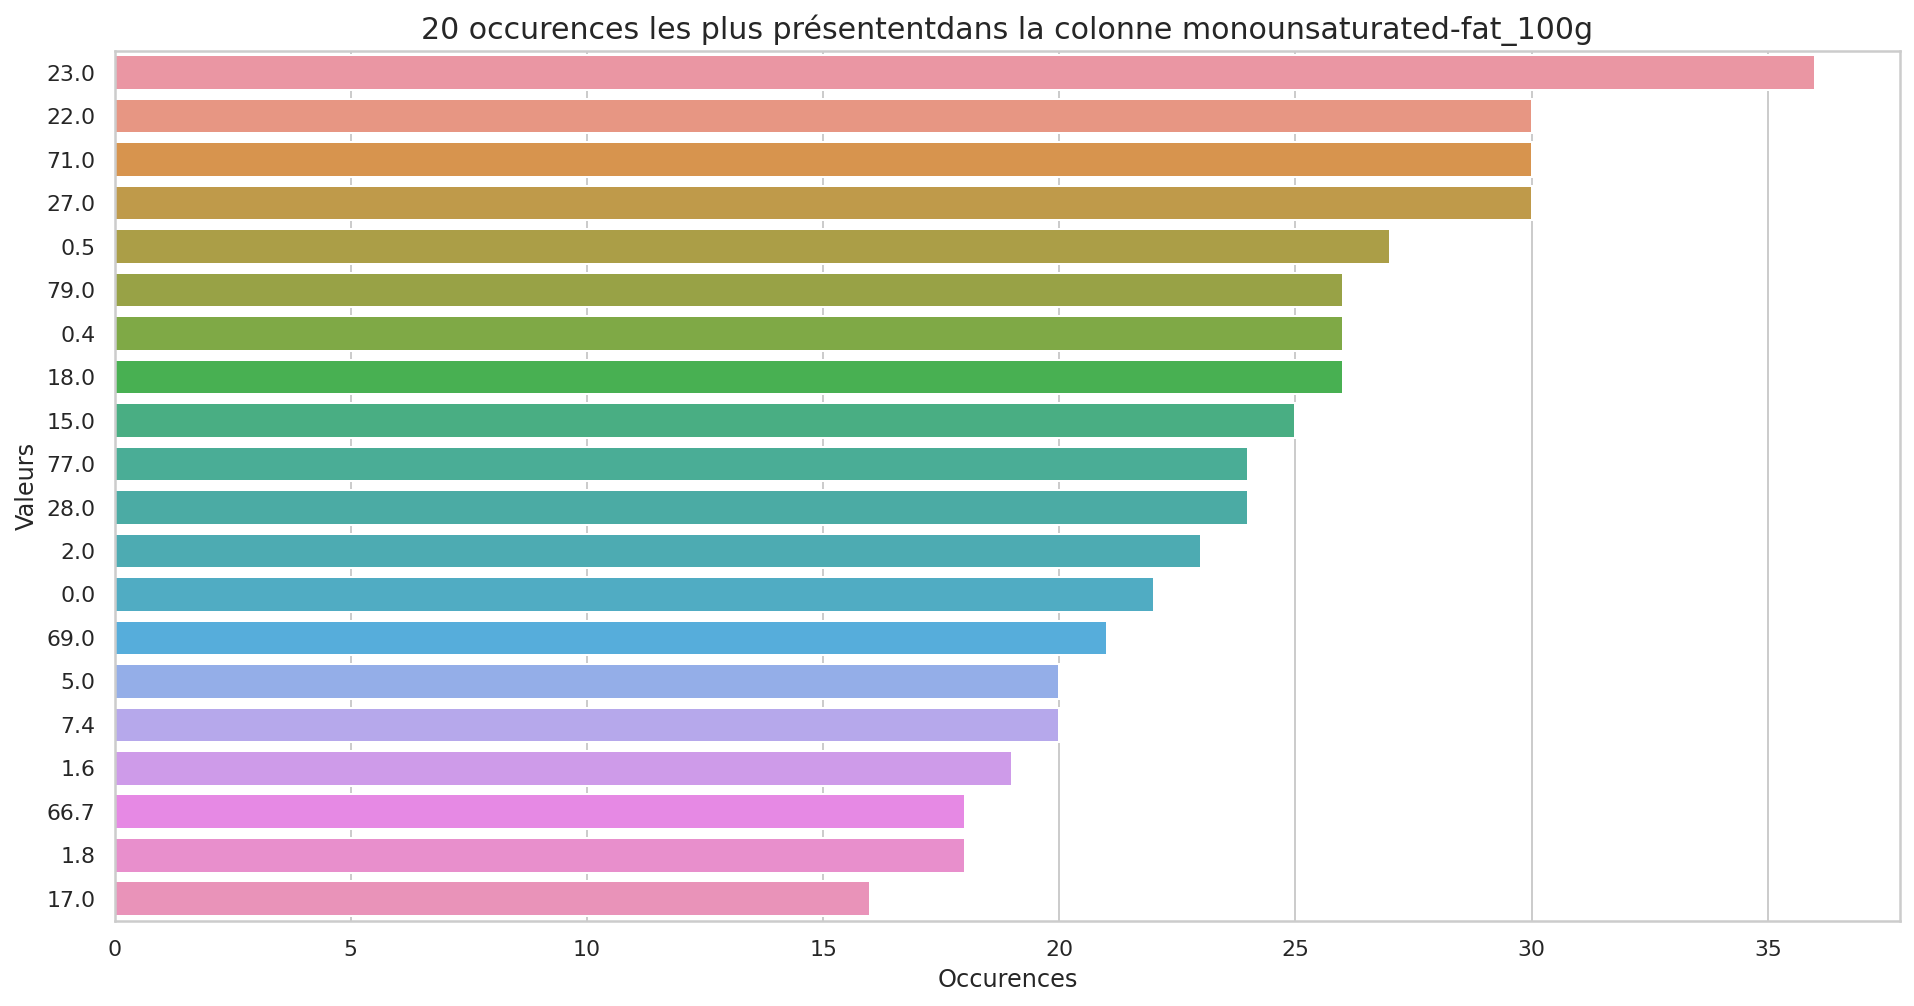

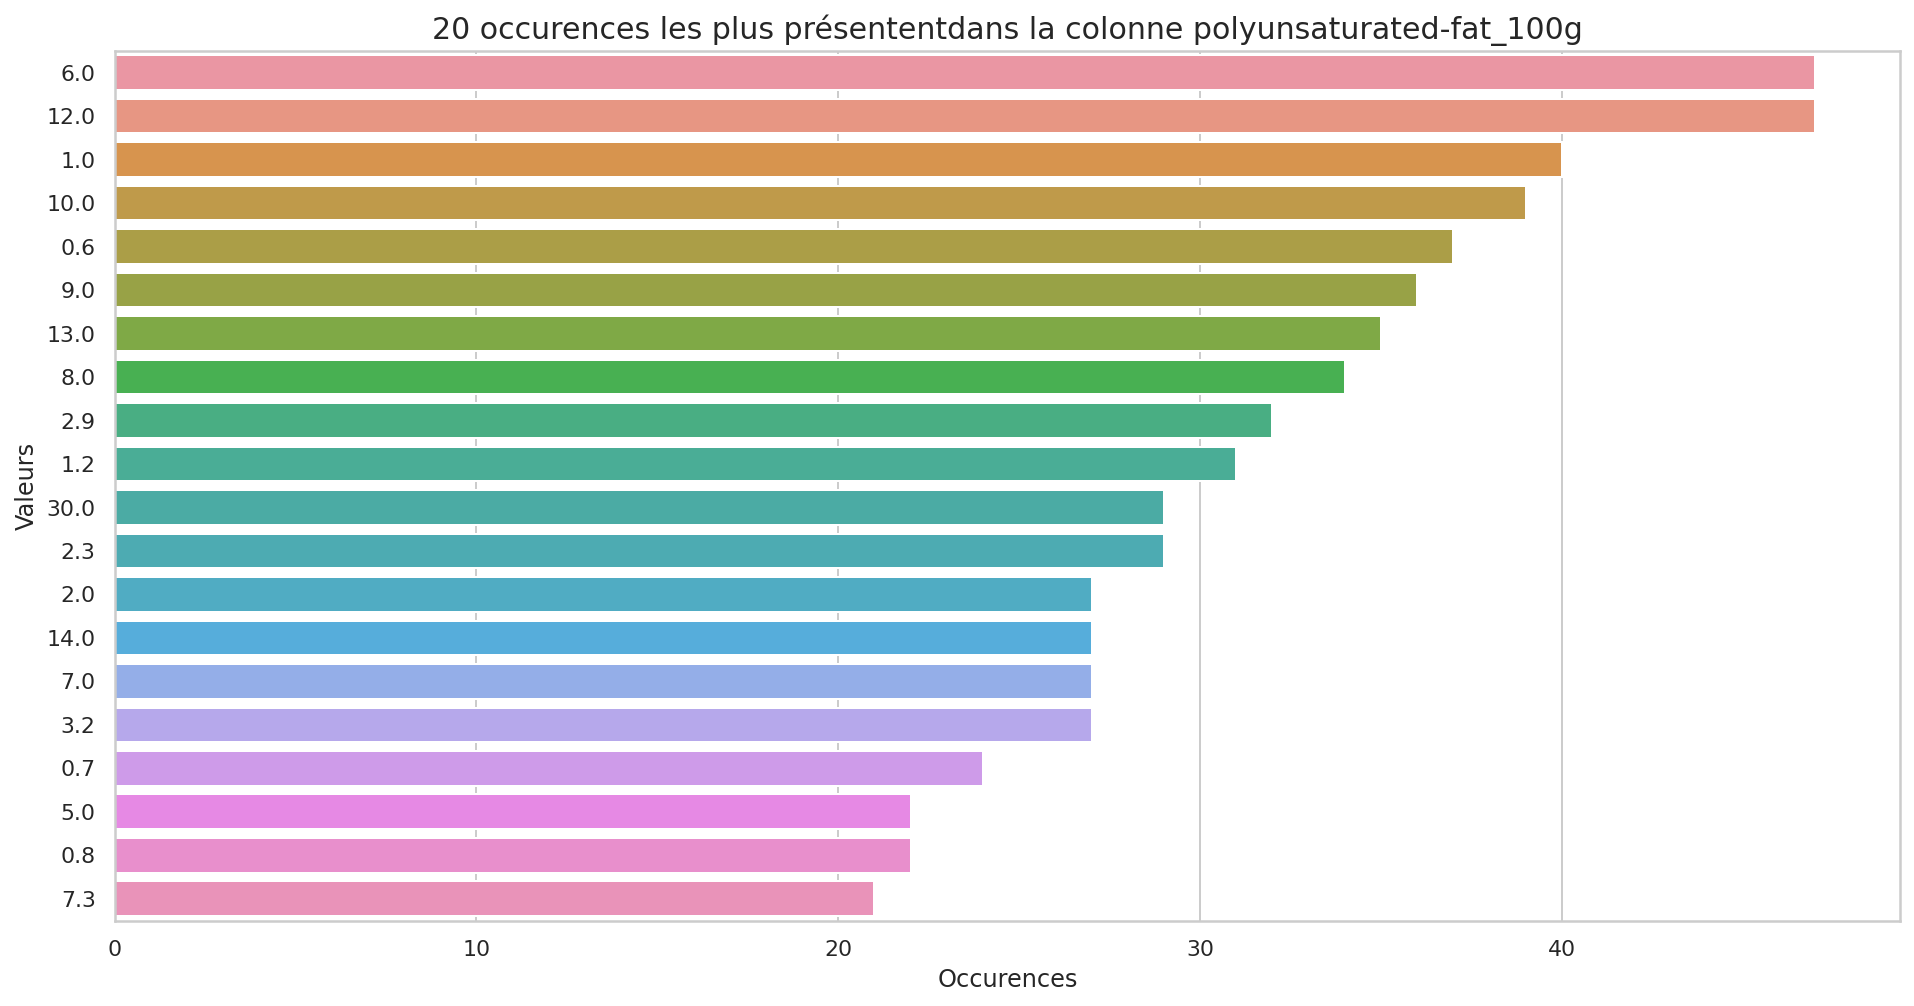

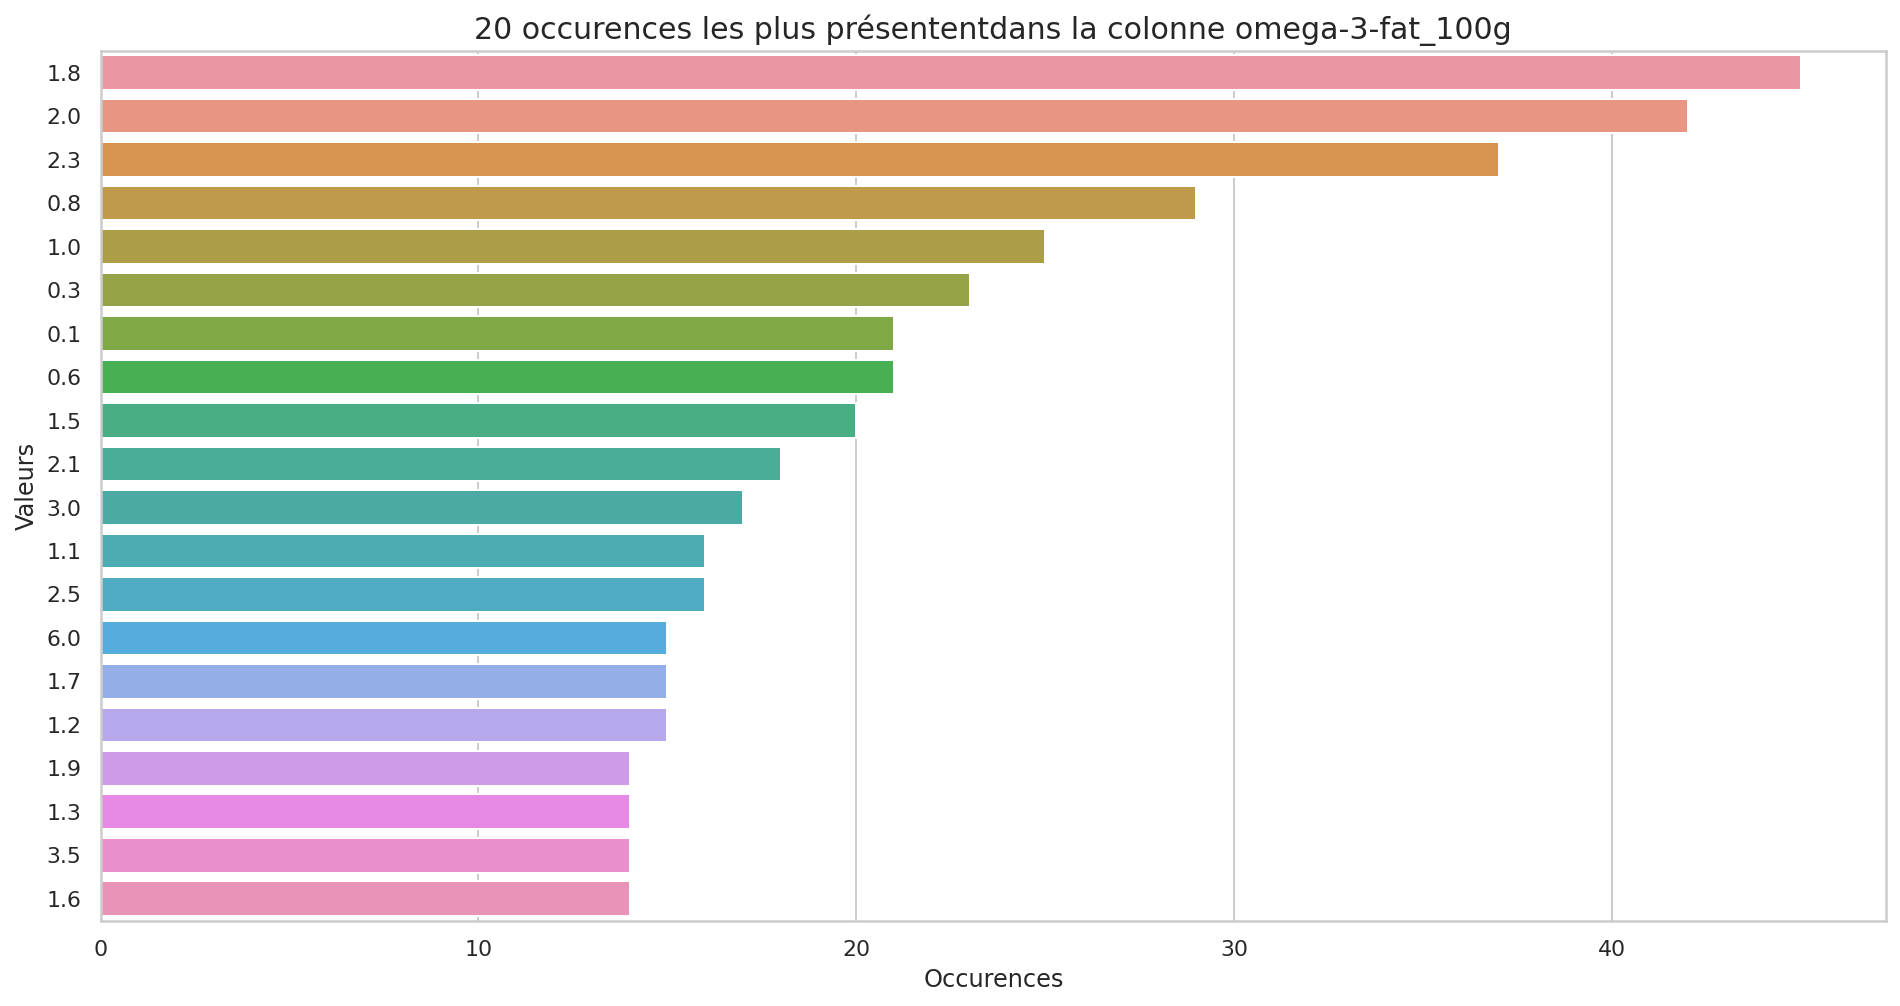

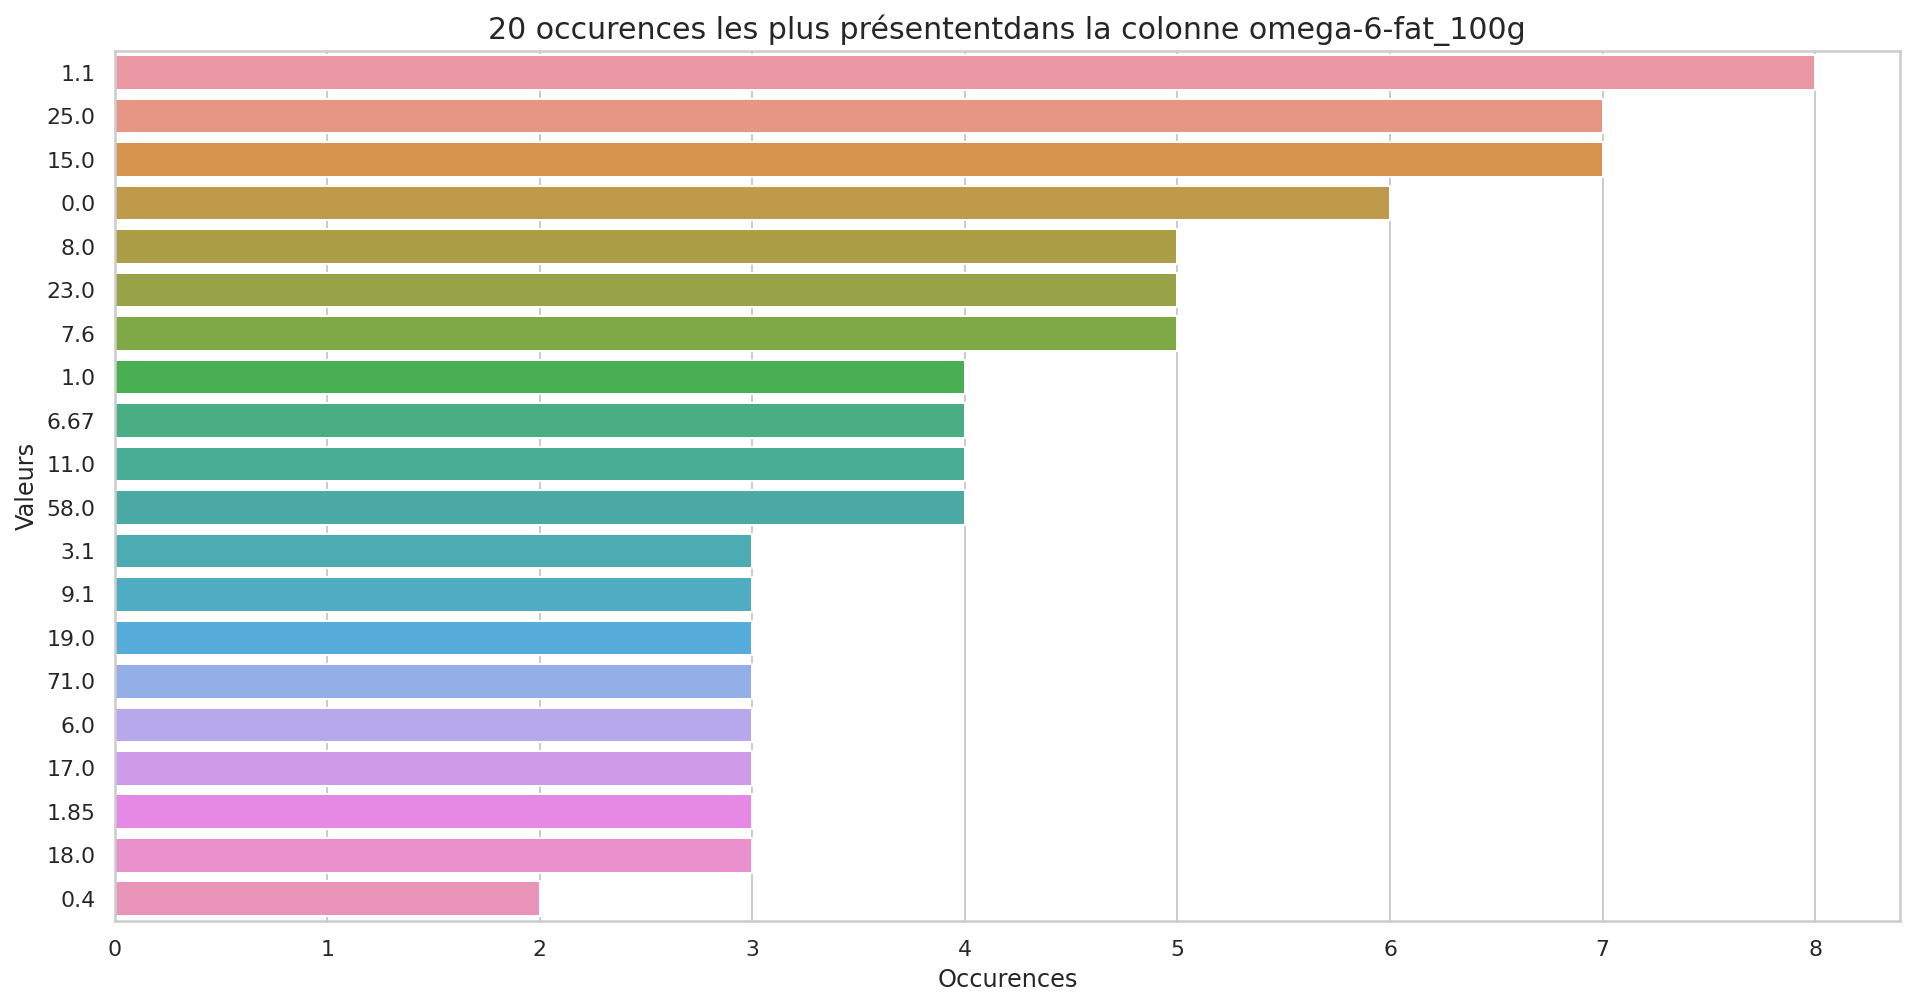

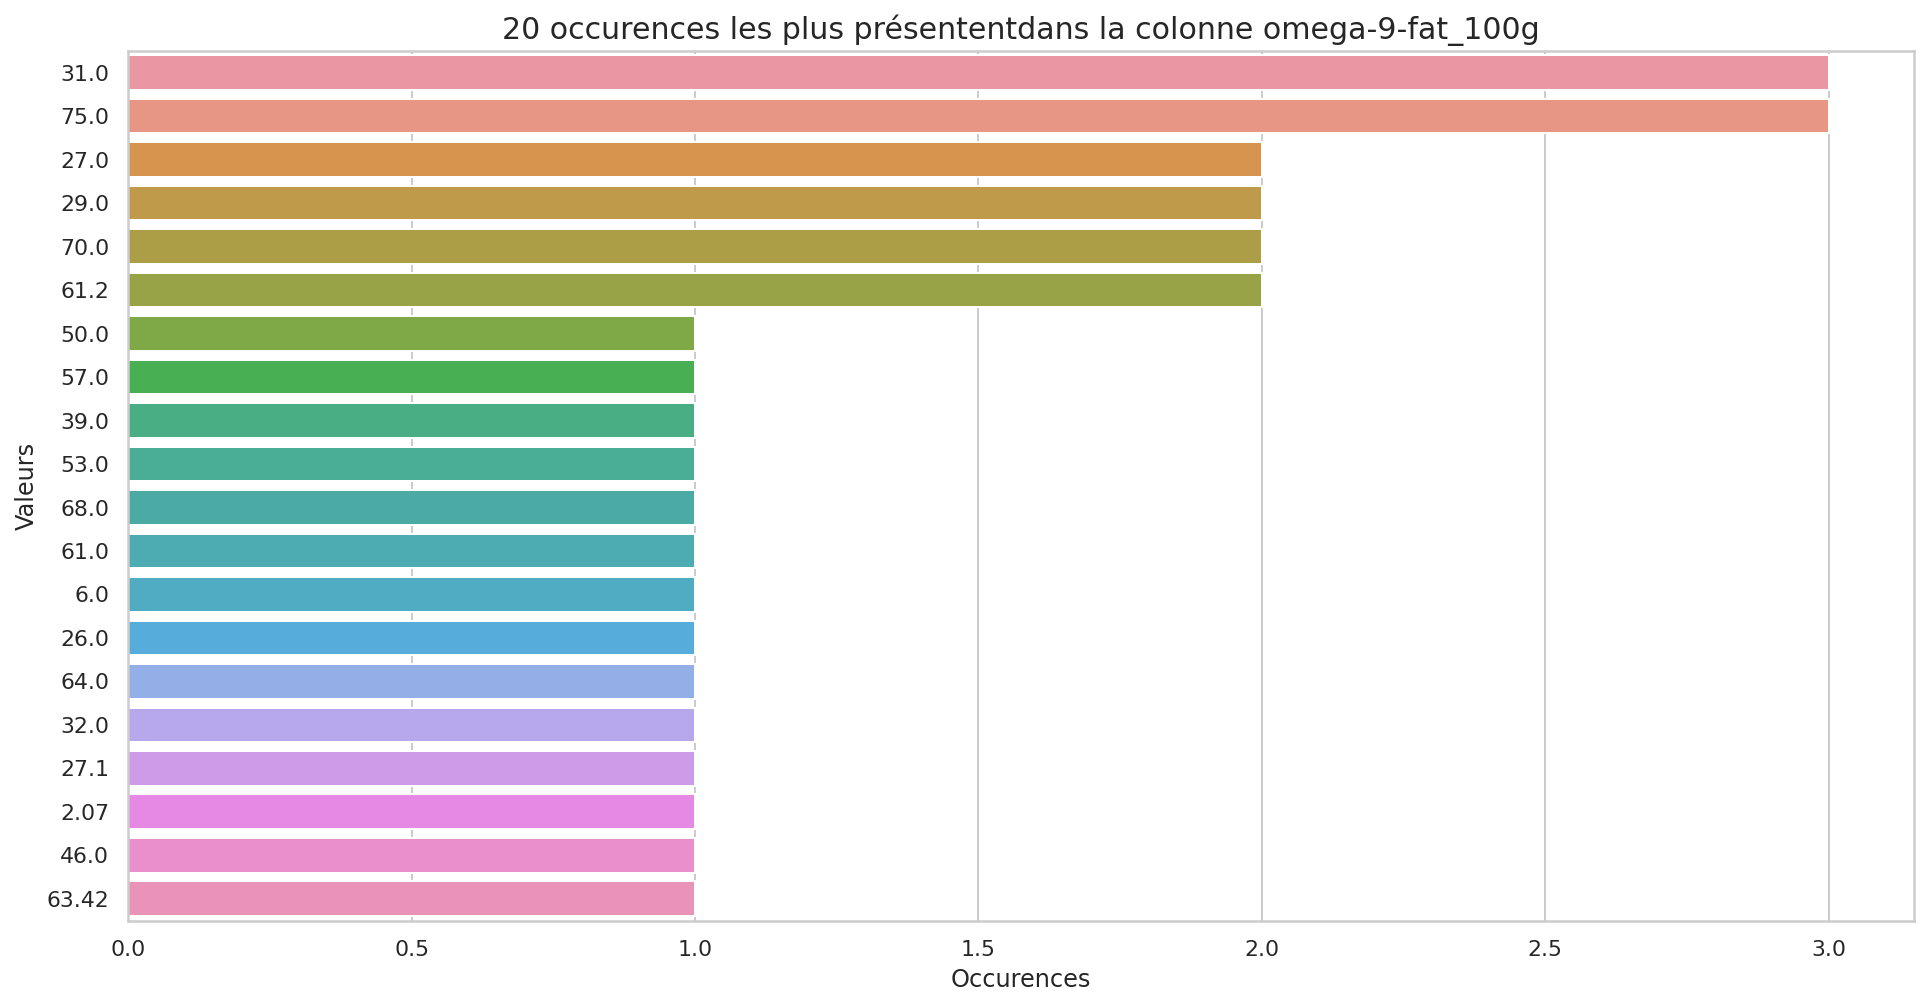

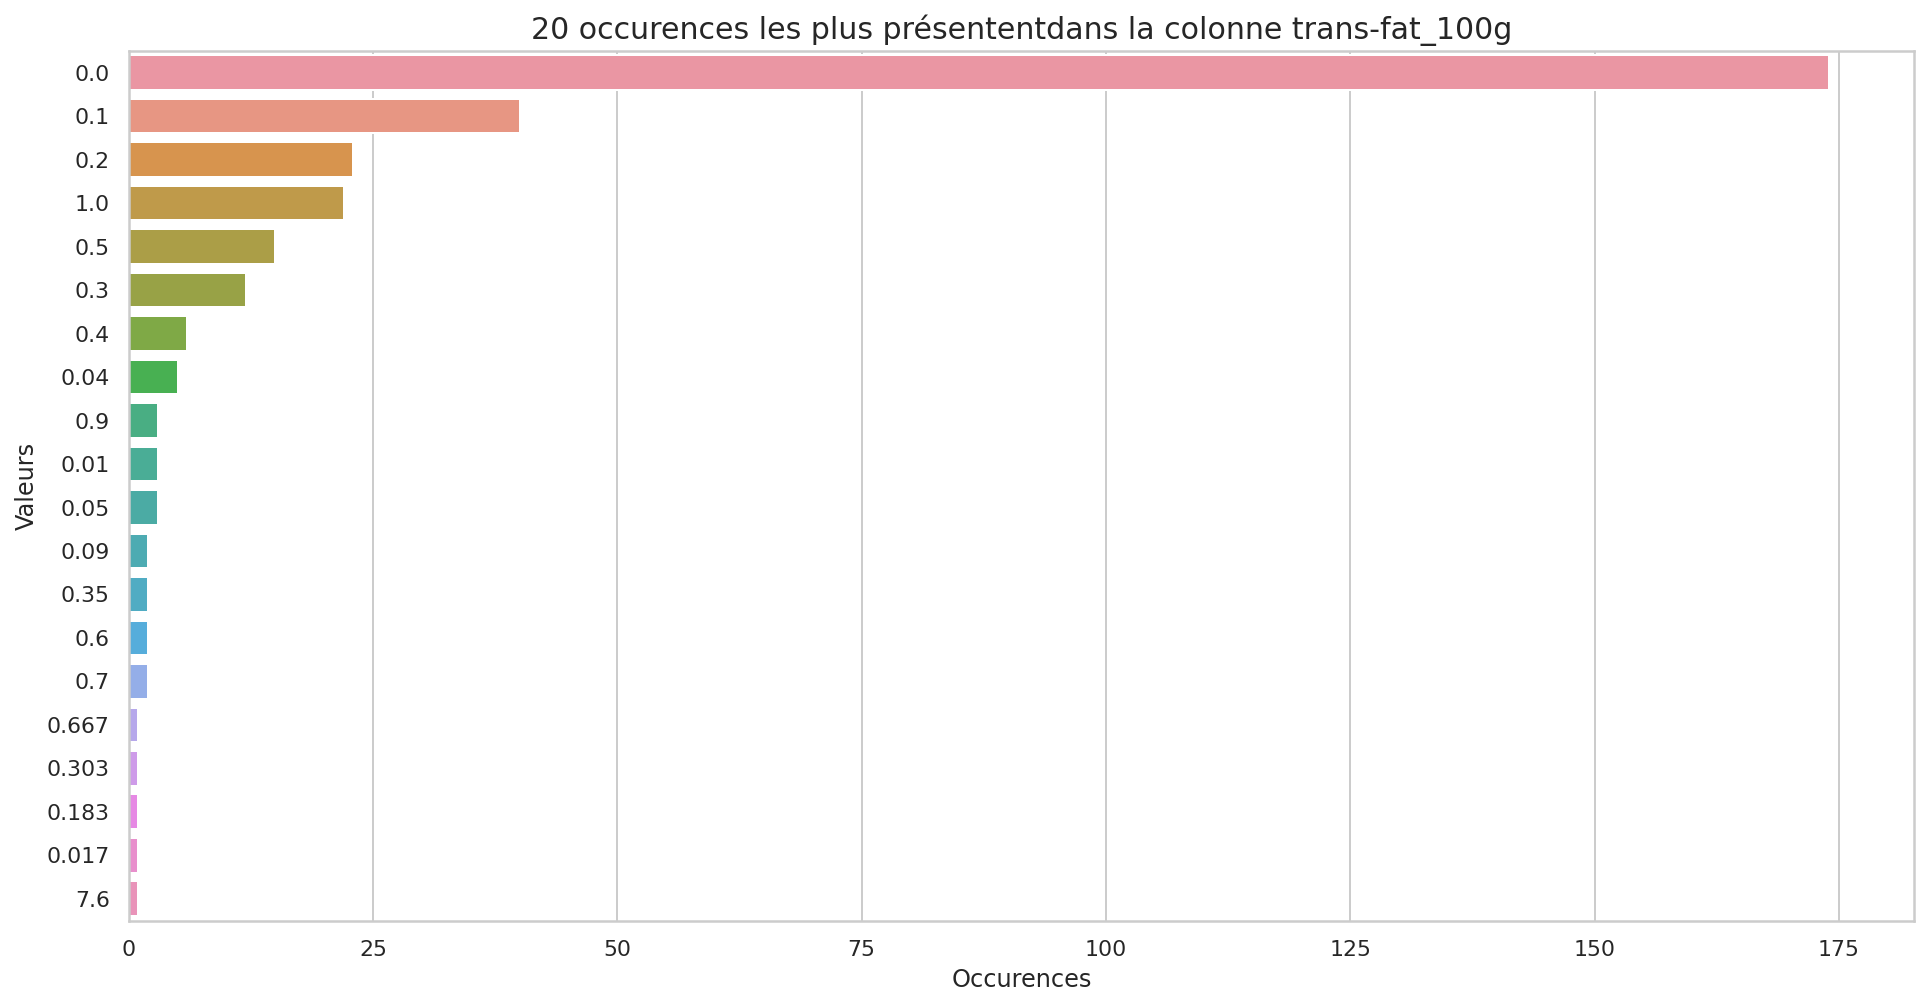

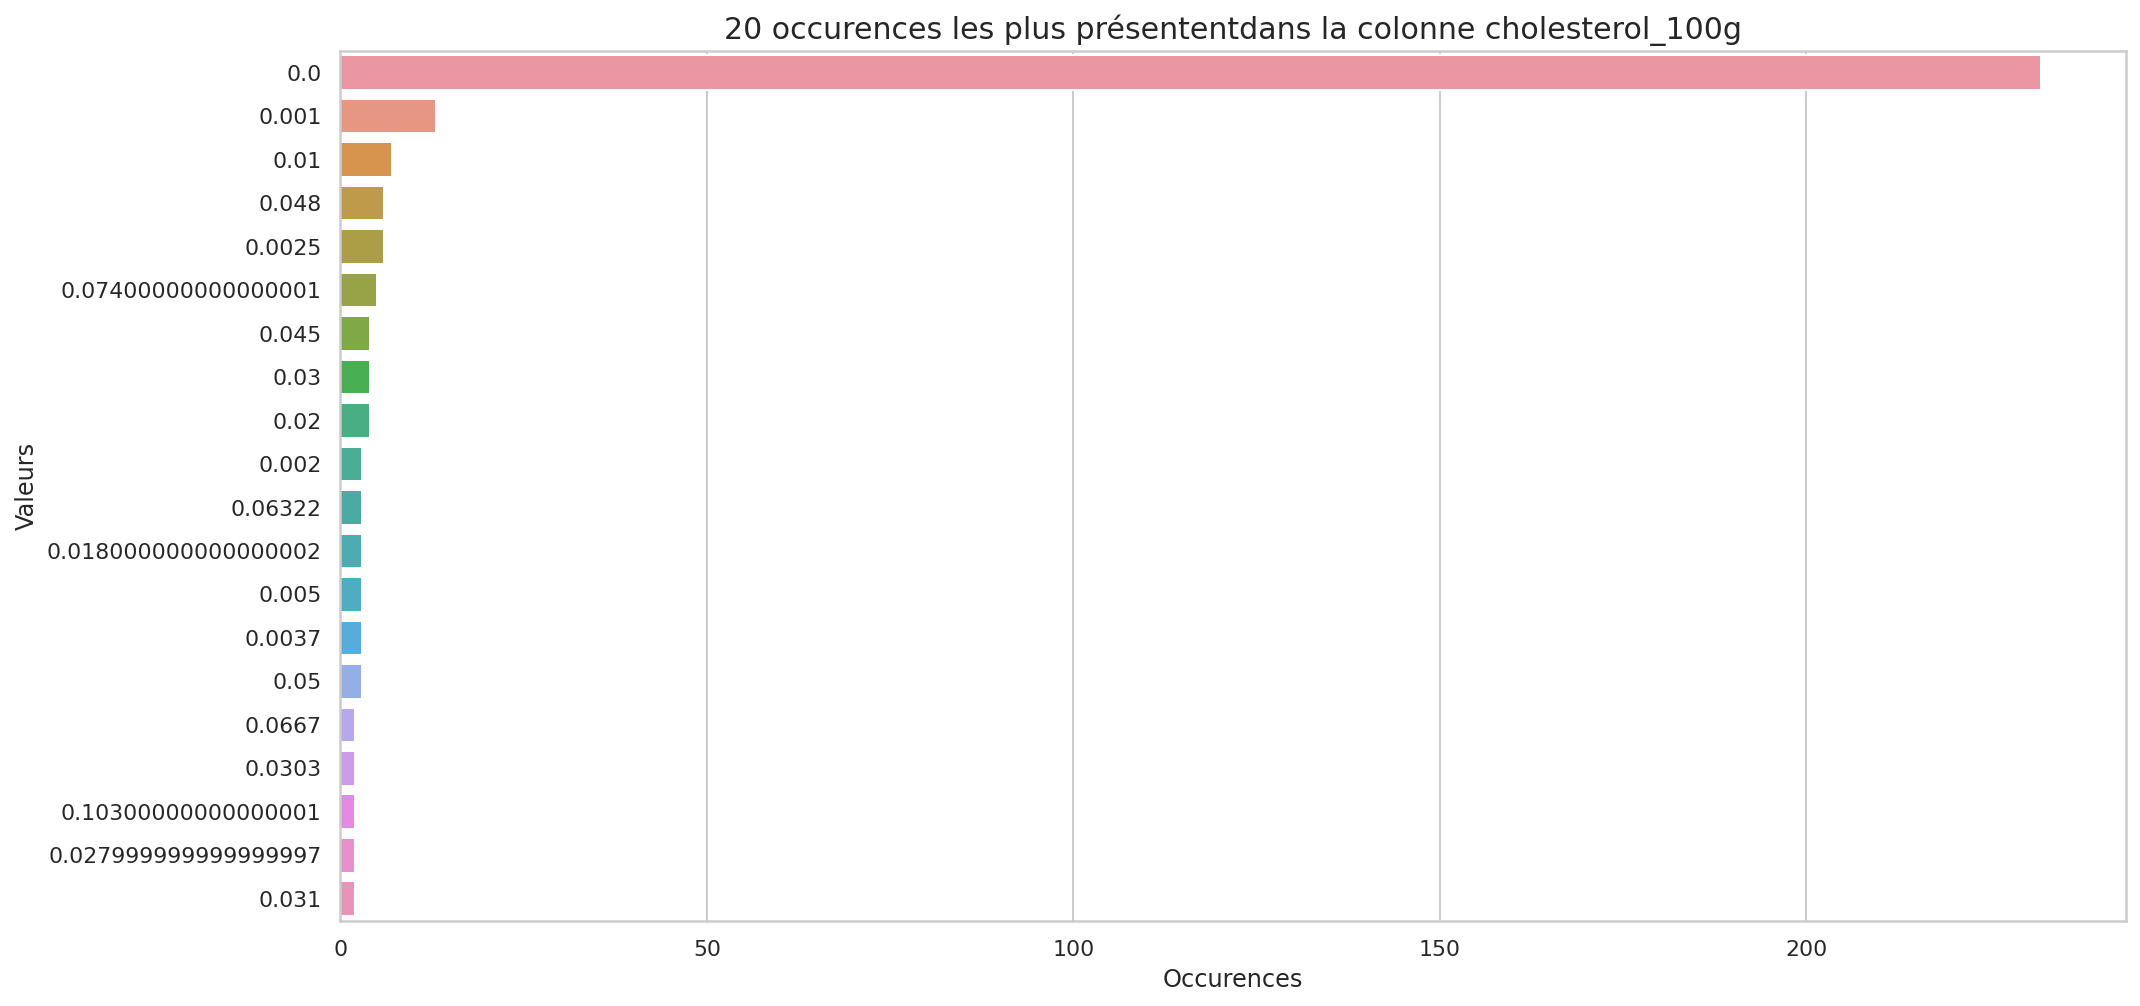

In [30]:
import collections
object_columns=(Nutri.columns.values)
mots_populaires = []
for colonne in object_columns :
    liste_mots = [str(i).split(' ', 1)[0] for i in Nutri[colonne].dropna().tolist()]
    mots_populaires.append(collections.Counter(liste_mots).most_common(20))

sns.set(font_scale=2.5)
for nom_colonne, liste_mots in zip(object_columns[1:], mots_populaires[1:]):
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))

    df_mots_utilises = pd.DataFrame(liste_mots, columns = ['Valeurs', 'Occurences']).sort_values(by='Occurences', ascending=False)
    df_mots_utilises.head()
    sns.barplot(y = 'Valeurs', x='Occurences', data = df_mots_utilises)
    plt.title('20 occurences les plus présententdans la colonne ' + nom_colonne, size=15)
    plt.show()

sns.set(font_scale=1)

In [31]:
# Vérifier si le fichier existe ou non
print('sauvegarde sur drive sous Nutri1')
if os.path.isfile('drive/MyDrive/P3/data/Nutri1.csv'):
    print("Fichier Nutri1 trouvé dans drive, effacement.")
    os.remove('drive/MyDrive/P3/data/Nutri1.csv')
    print('sauvegarde sur drive du nouveau fichier Nutri1')
    
    #Sauvegarde de Nutri1 en fichier .csv sur google drive
    Nutri1.to_csv('drive/MyDrive/P3/data/Nutri1.csv', index = False)
print('Fichier Nutri1 sauvegarde sous ; drive/MyDrive/P3/data/Nutri1.csv')

sauvegarde sur drive sous Nutri1
Fichier Nutri1 trouvé dans drive, effacement.
sauvegarde sur drive du nouveau fichier Nutri1
Fichier Nutri1 sauvegarde sous ; drive/MyDrive/P3/data/Nutri1.csv


Utilisation de Missingo pour les valeurs manquantes



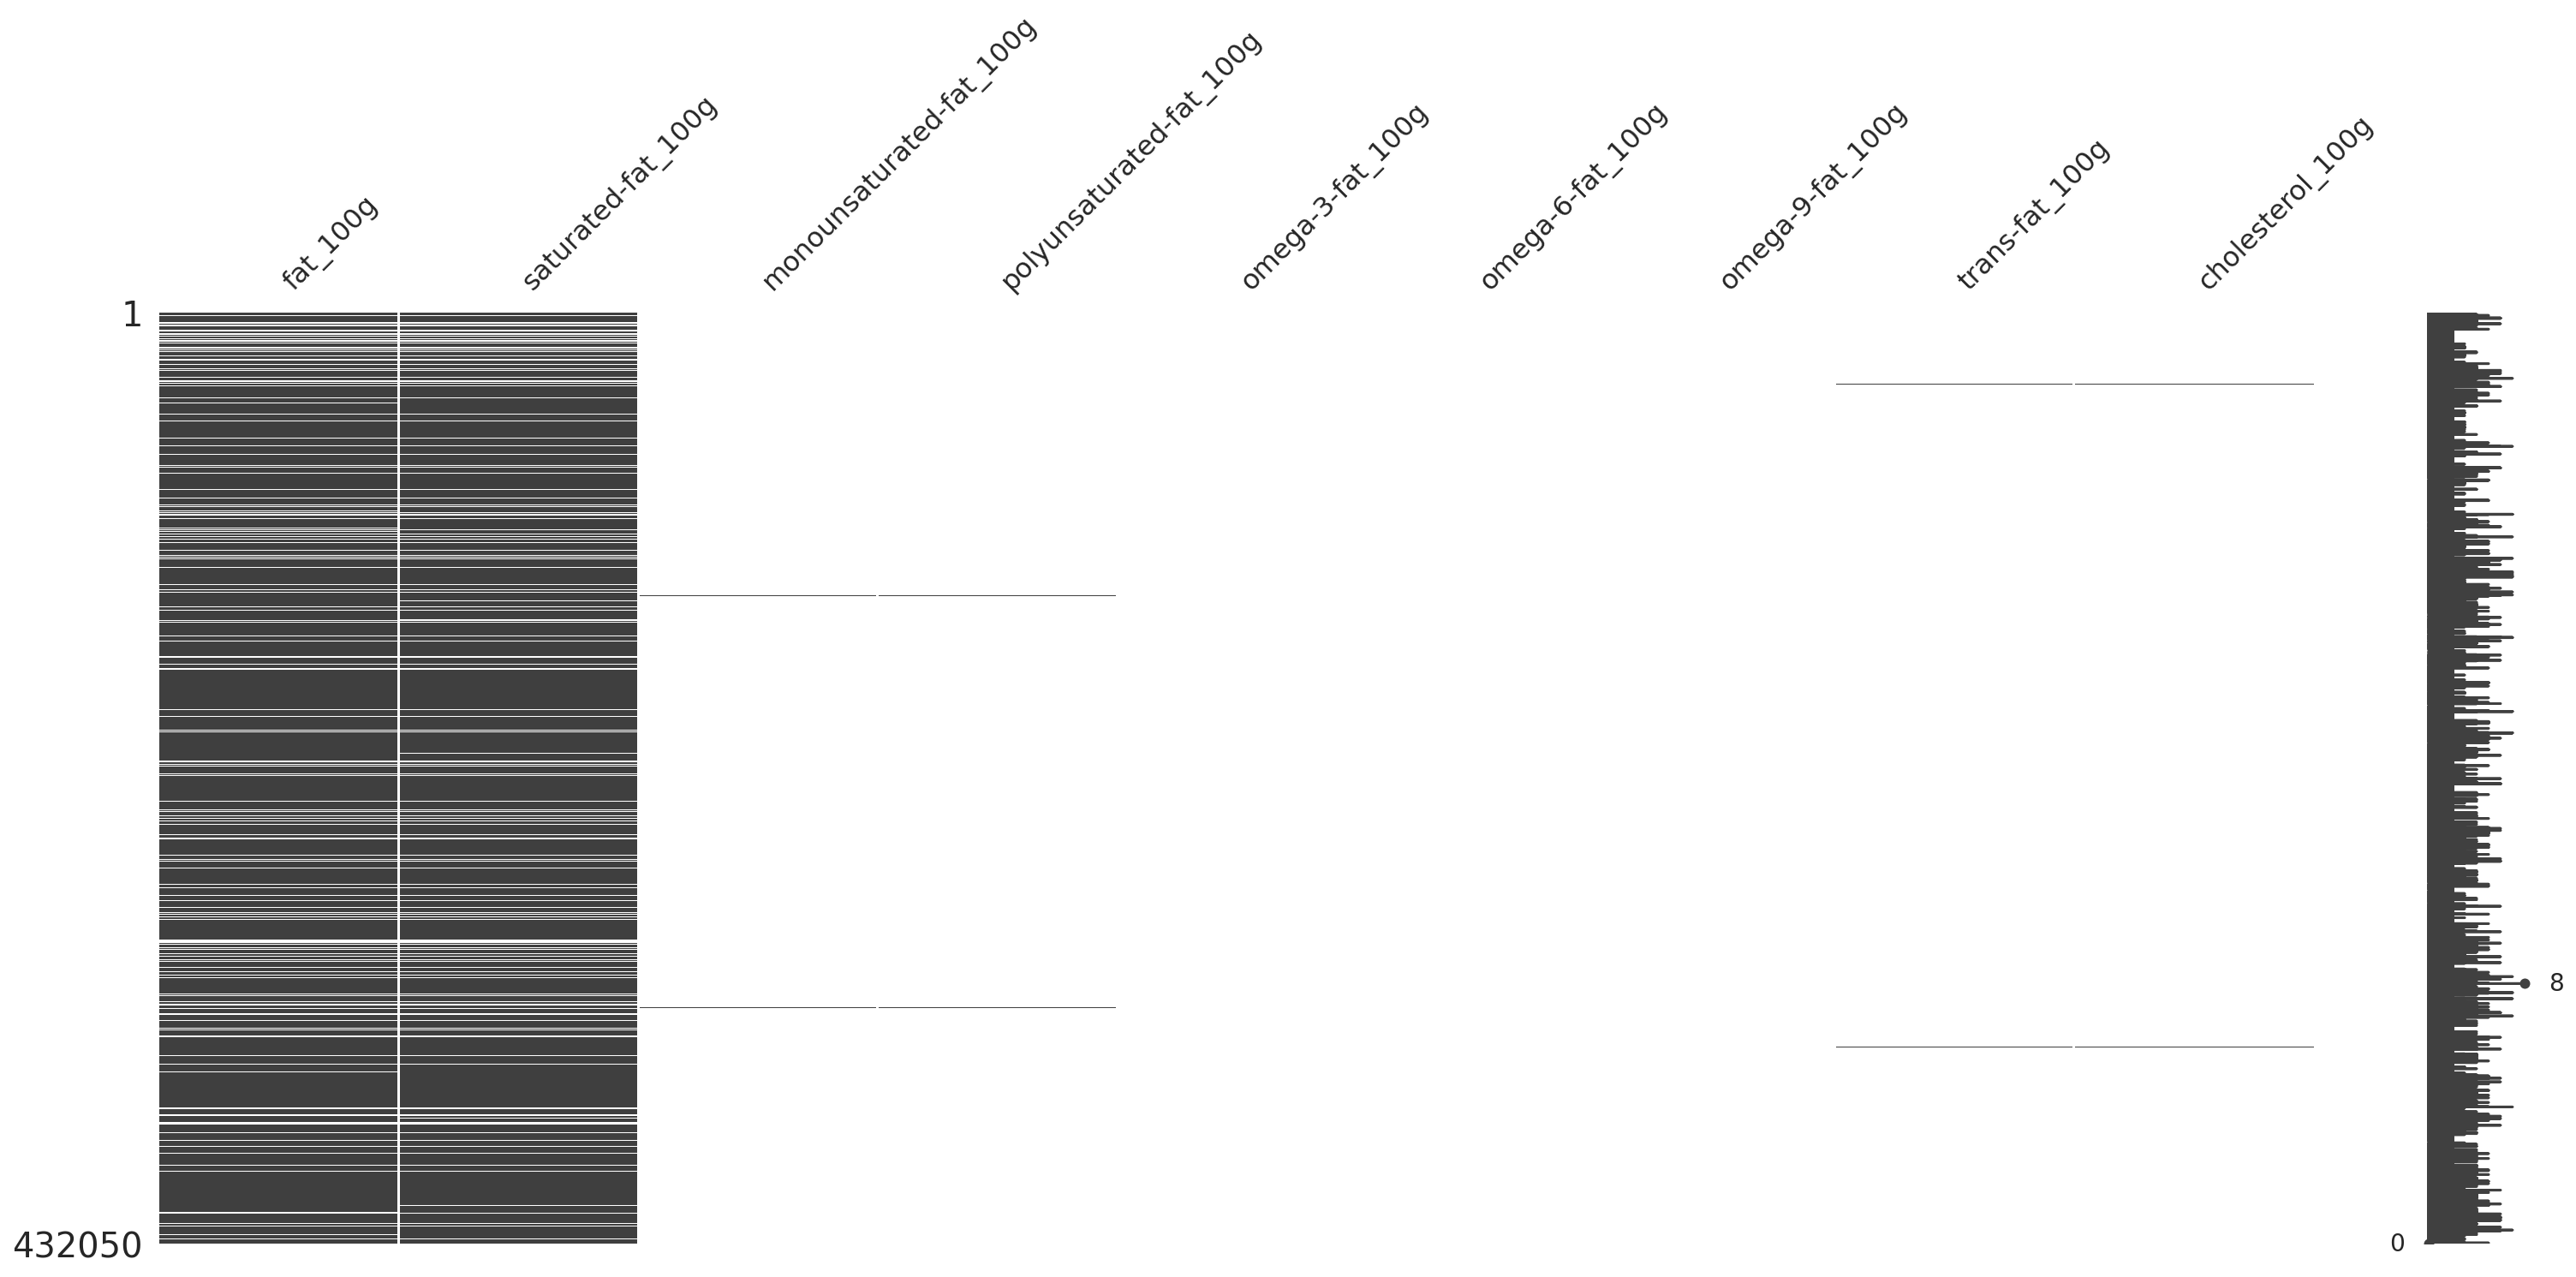

In [32]:
# Visualize the number of missing
# values as a bar chart
msno.matrix(Nutri1)

Autre présentation des valeurs manquantes

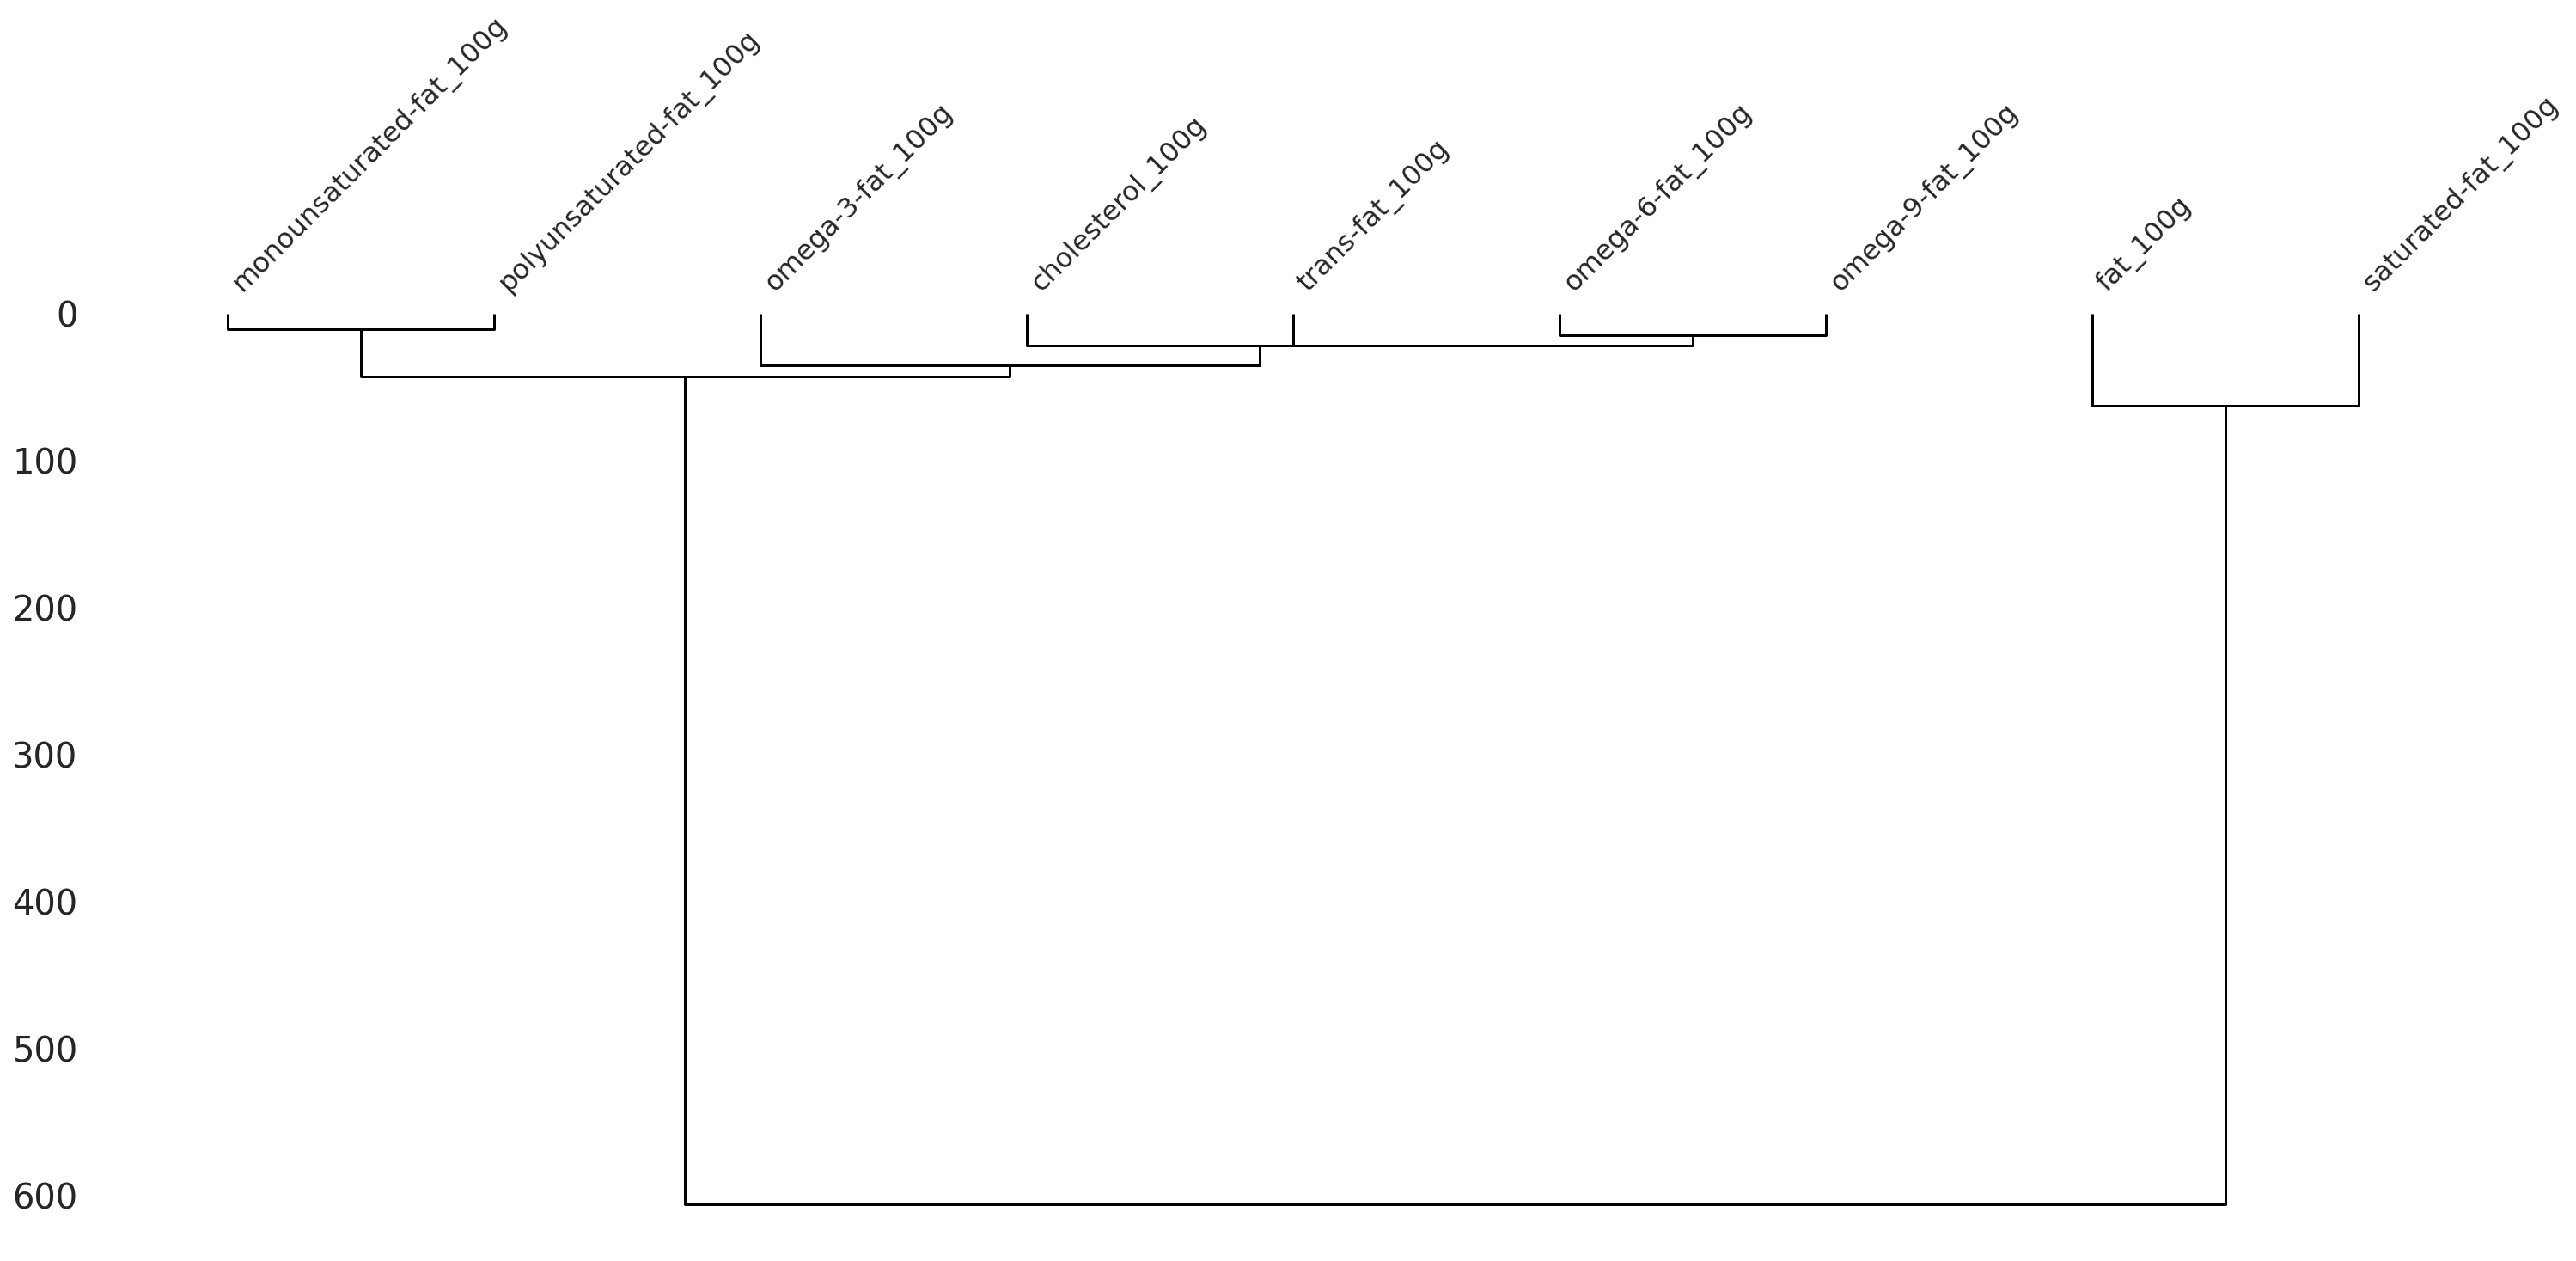

In [33]:
msno.dendrogram(Nutri1)

In [34]:

print ("Le dataset cleané compte {} individues et {} variables".format(Nutri1.shape[0], Nutri1.shape[1]))

Le dataset cleané compte 432050 individues et 9 variables


In [35]:
#utilisation de ma fonction valmanque pour les valeurs manquantes
ColRest=valmanque(Nutri1,10,1)

nombre de lignes : 432050
nombre de ligne contenant des valeurs nul:
fat_100g                     64414
saturated-fat_100g           63756
monounsaturated-fat_100g    430364
polyunsaturated-fat_100g    430334
omega-3-fat_100g            430929
omega-6-fat_100g            431818
omega-9-fat_100g            432016
trans-fat_100g              431713
cholesterol_100g            431678
dtype: int64

données par ligne après supression des valeurs null
-----------------------------------------
fat_100g
367636  nombres de lignes remplies
14.908922578405278  % vide
-----------------------------------------
saturated-fat_100g
368294  nombres de lignes remplies
14.756625390579794  % vide
-----------------------------------------
monounsaturated-fat_100g
1686  nombres de lignes remplies
99.60976738803379  % vide
-----------------------------------------
polyunsaturated-fat_100g
1716  nombres de lignes remplies
99.60282374725148  % vide
-----------------------------------------
omega-3-fat_100g
112

Plus de 99 % de produit sans oméga ?

In [36]:
Var=('fat_100g','saturated-fat_100g')

for Bcl in Var:

  # total supérieur à 100
  
 
  df_mask=Nutri1['saturated-fat_100g']<100
  filtered_df = Nutri1[df_mask]
  Nutri1=filtered_df.copy()
  df_mask=Nutri1['fat_100g']<100
  filtered_df = Nutri1[df_mask]
  Nutri1=filtered_df.copy()
 




In [37]:
Nutri1.describe()

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g
count,363976.000000,363976.000000,1380.000000,1409.000000,1041.000000,164.000000,13.000000,330.000000,335.000000
mean,13.388919,5.269172,21.139489,8.213140,2.589032,9.067331,29.666577,0.242686,0.121368
std,16.185686,7.701982,24.381481,11.218018,4.248957,10.904617,20.073996,0.840065,1.438004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,0.000000,0.000000
25%,1.000000,0.200000,2.600000,1.700000,0.477000,1.100000,27.000000,0.000000,0.000000
50%,7.400000,2.000000,9.500000,4.000000,1.700000,5.250000,31.000000,0.000000,0.000000
75%,21.600000,7.600000,28.000000,9.700000,3.000000,15.000000,32.000000,0.200000,0.011750
max,99.980000,99.900000,82.200000,69.000000,60.000000,58.000000,64.000000,12.000000,24.000000


Maintenant nous allons supprimer les lignes dont la valeur total des ingrédients sur 100g de produit dépasse 100.

In [38]:
new_df=Nutri1.fillna(0)

In [39]:
new_df=Nutri1.assign(tot=(Nutri1['omega-3-fat_100g']+Nutri1['omega-6-fat_100g']+Nutri1['omega-9-fat_100g']+Nutri1['saturated-fat_100g']+Nutri1['monounsaturated-fat_100g']+ Nutri1['polyunsaturated-fat_100g']+Nutri1[ 'trans-fat_100g']+Nutri1[ 'cholesterol_100g']))

In [40]:
# Get names of indexes for which column Stock has value No
indexNames = new_df[ new_df['tot'] <100 ].index
# Delete these row indexes from dataFrame



In [41]:
new_df.describe()

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,tot
count,363976.000000,363976.000000,1380.000000,1409.000000,1041.000000,164.000000,13.000000,330.000000,335.000000,0.0
mean,13.388919,5.269172,21.139489,8.213140,2.589032,9.067331,29.666577,0.242686,0.121368,NaN
std,16.185686,7.701982,24.381481,11.218018,4.248957,10.904617,20.073996,0.840065,1.438004,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,0.000000,0.000000,NaN
25%,1.000000,0.200000,2.600000,1.700000,0.477000,1.100000,27.000000,0.000000,0.000000,NaN
50%,7.400000,2.000000,9.500000,4.000000,1.700000,5.250000,31.000000,0.000000,0.000000,NaN
75%,21.600000,7.600000,28.000000,9.700000,3.000000,15.000000,32.000000,0.200000,0.011750,NaN
max,99.980000,99.900000,82.200000,69.000000,60.000000,58.000000,64.000000,12.000000,24.000000,NaN


Les maximas sont bien à 100

Comme nous nous occupons des graisses nous allons suprimmer tout les produits ou la variable fat_100g est vide car ces produits ne contiennent pas de graisses.



---



In [42]:
Nutri_temp=Nutri1.copy()

In [43]:
print(Nutri_temp['fat_100g'].count())

363976


In [44]:
Fat_Nutri1_null=Nutri_temp[Nutri_temp['fat_100g']==0]
print('Nombre individu à supprimer  contenant 0 graisse ')
print()
print(Fat_Nutri1_null['fat_100g'].count())

Nombre individu à supprimer  contenant 0 graisse 

38101


In [45]:
#supression des individu contenant 0 graisse
 
Fat_Nutri1_null=Fat_Nutri1_null[Fat_Nutri1_null['fat_100g']!=0]

In [46]:
# recherche du type de variable dans 
Nutri1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363976 entries, 1 to 1895916
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   fat_100g                  363976 non-null  float64
 1   saturated-fat_100g        363976 non-null  float64
 2   monounsaturated-fat_100g  1380 non-null    float64
 3   polyunsaturated-fat_100g  1409 non-null    float64
 4   omega-3-fat_100g          1041 non-null    float64
 5   omega-6-fat_100g          164 non-null     float64
 6   omega-9-fat_100g          13 non-null      float64
 7   trans-fat_100g            330 non-null     float64
 8   cholesterol_100g          335 non-null     float64
dtypes: float64(9)
memory usage: 27.8 MB


# Nouvelle section

In [47]:
 X=Nutri_temp.columns.values
X

array(['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g',
       'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g'],
      dtype=object)

In [48]:
# Création liste des Y
Y=[]
for i in X:
 Y.append((Nutri_temp[i]).count())
print(Y)


[363976, 363976, 1380, 1409, 1041, 164, 13, 330, 335]


Création d'un dataframme libellé, Nb Ligne

In [49]:
df = pd.DataFrame(list(zip(X,Y)),columns =[ 'variable','Nb_individu'])
df

,variable,Nb_individu
0,fat_100g,363976
1,saturated-fat_100g,363976
2,monounsaturated-fat_100g,1380
3,polyunsaturated-fat_100g,1409
4,omega-3-fat_100g,1041
5,omega-6-fat_100g,164
6,omega-9-fat_100g,13
7,trans-fat_100g,330
8,cholesterol_100g,335


In [50]:
#reprenons le nom Nutri
Nutri=Nutri_temp.copy()

In [51]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'


<BarContainer object of 9 artists>

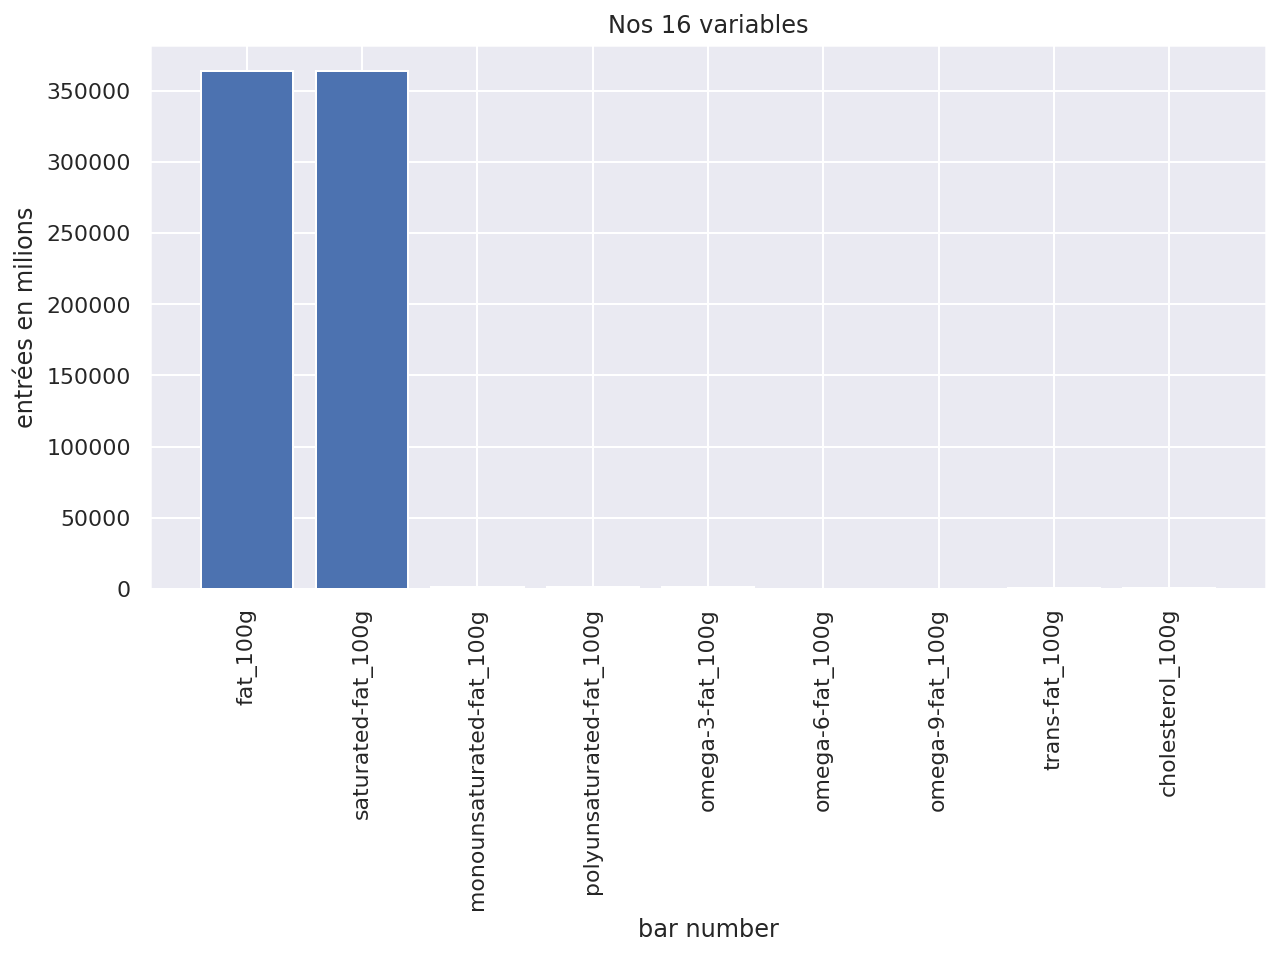

In [52]:

plt.figure (figsize=(10,5))


plt.xlabel("bar number")
plt.xticks(rotation=90)
plt.ylabel("entrées en milions")
plt.title("Nos 16 variables")
plt.bar(X, Y, label="Blue Bar", color='b')


In [53]:
#les variables retenues
Va=(Nutri.columns.values)
print(Va)

['fat_100g' 'saturated-fat_100g' 'monounsaturated-fat_100g'
 'polyunsaturated-fat_100g' 'omega-3-fat_100g' 'omega-6-fat_100g'
 'omega-9-fat_100g' 'trans-fat_100g' 'cholesterol_100g']


Occupons nous des valeurs Nan

<Figure size 2088x1008 with 0 Axes>

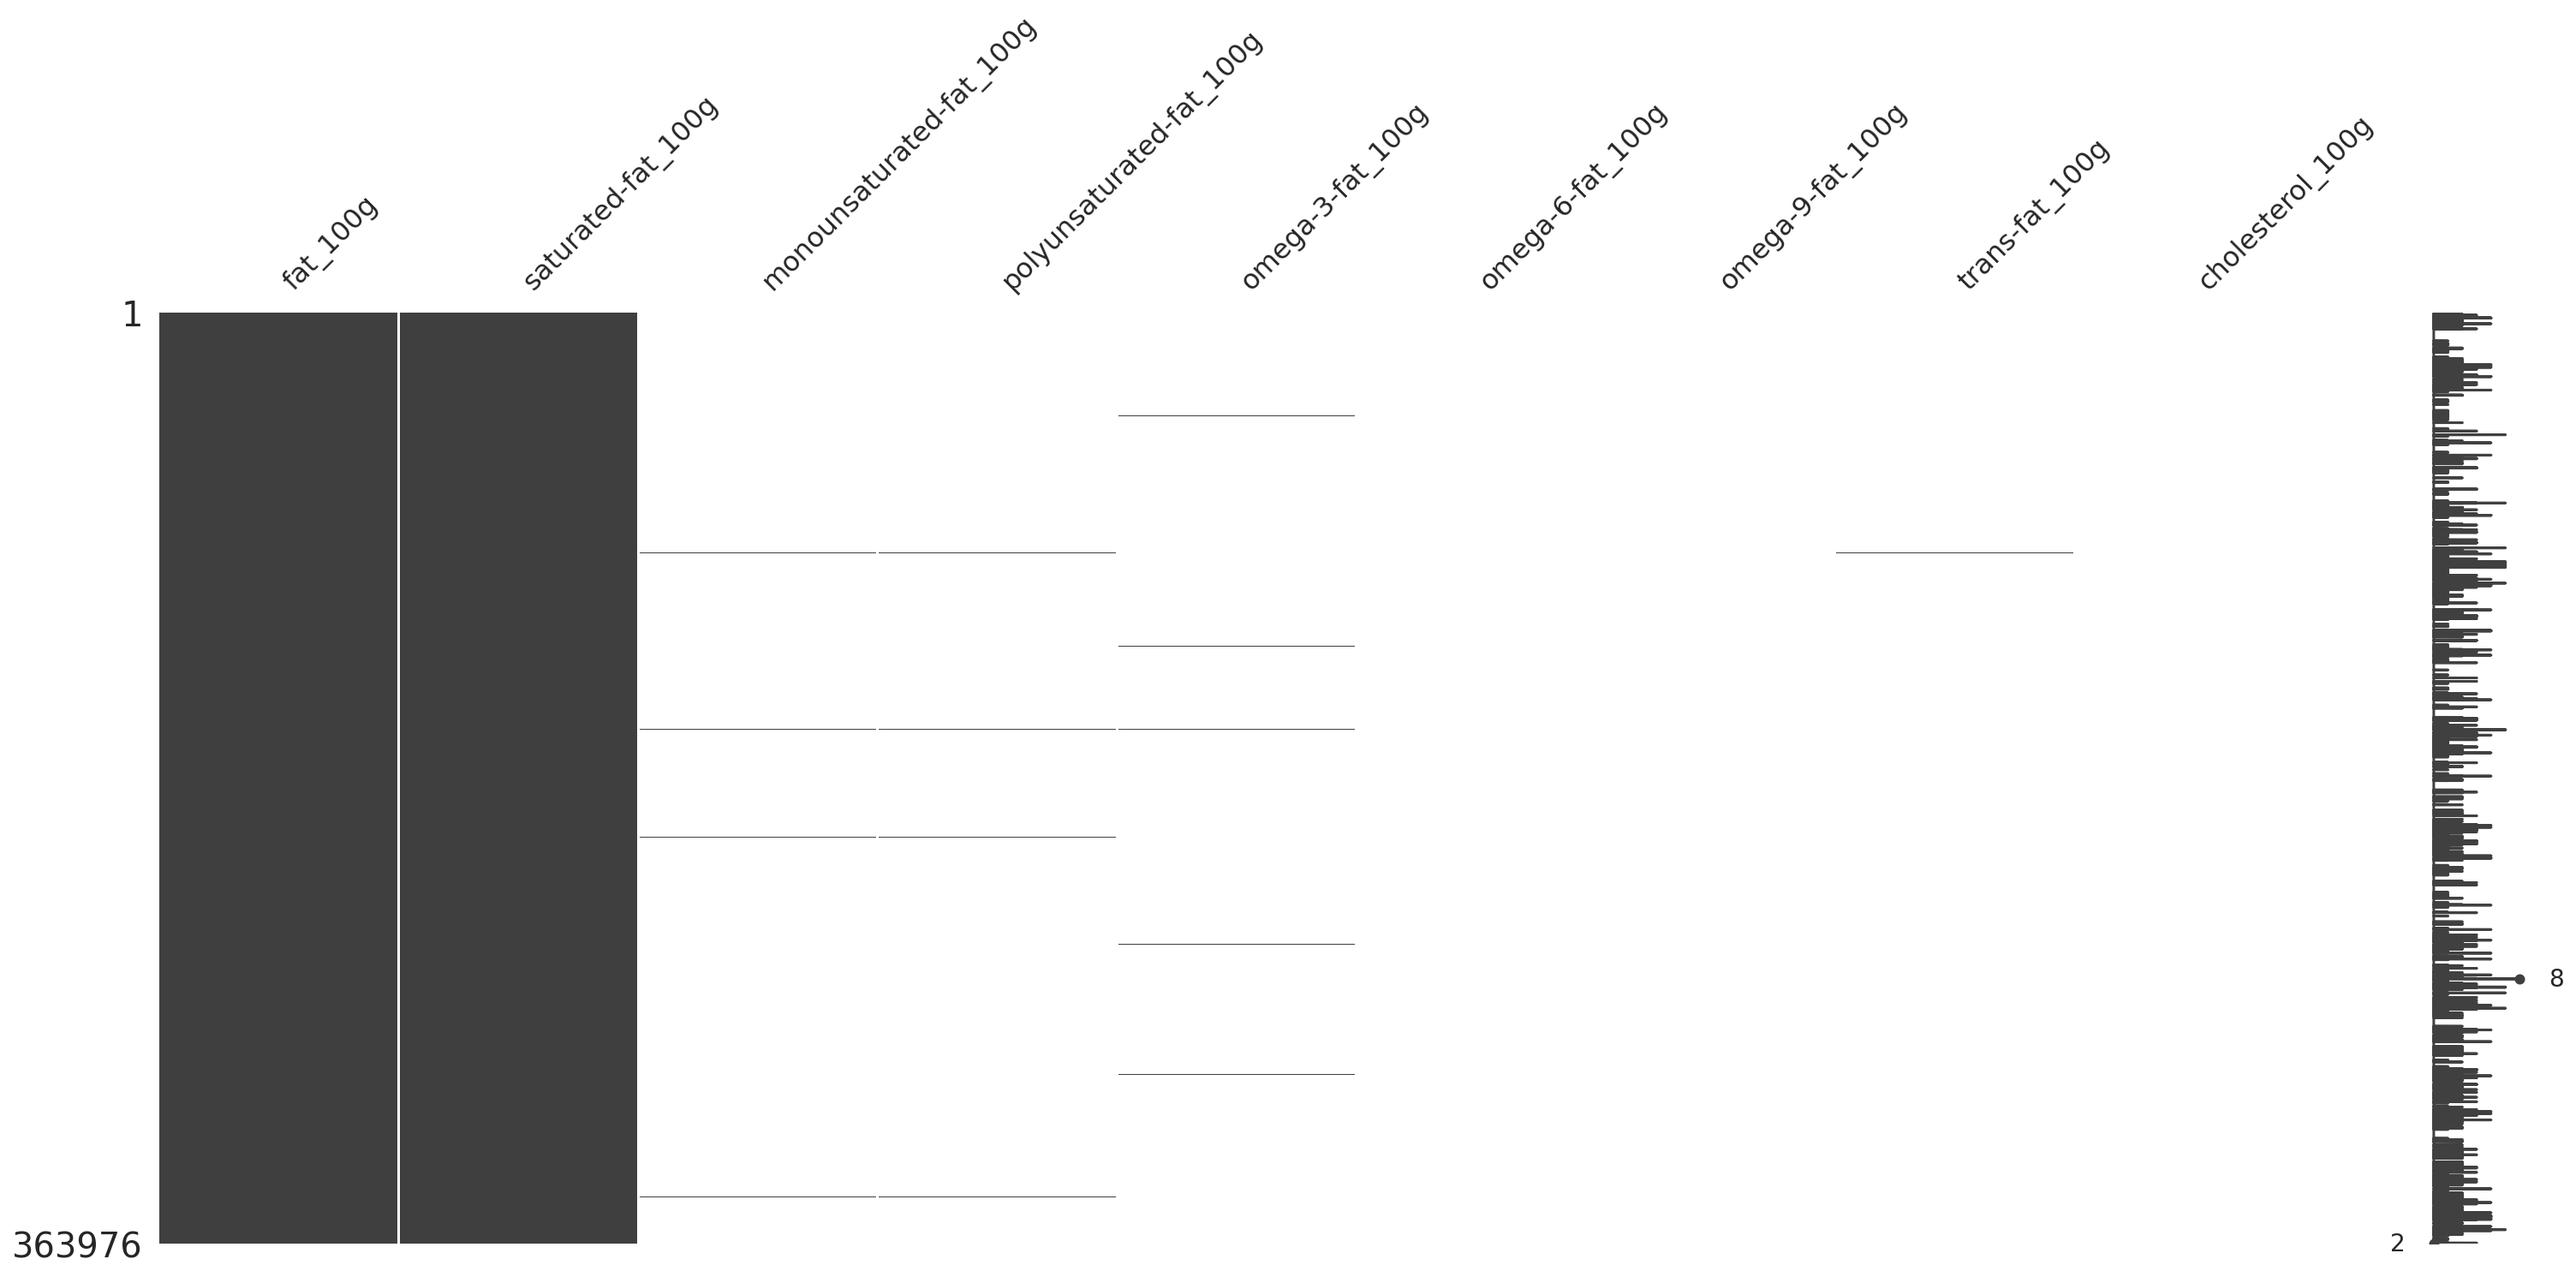

<Figure size 2088x1008 with 0 Axes>

In [54]:
msno.matrix(Nutri1)
plt.yticks(rotation=0)
plt.figure (figsize=(29,14))




In [55]:
print(Nutri[Nutri['fat_100g'].notna()].count())


fat_100g                    363976
saturated-fat_100g          363976
monounsaturated-fat_100g      1380
polyunsaturated-fat_100g      1409
omega-3-fat_100g              1041
omega-6-fat_100g               164
omega-9-fat_100g                13
trans-fat_100g                 330
cholesterol_100g               335
dtype: int64


In [56]:

Nutri = Nutri[Nutri['fat_100g'].notnull()]

In [57]:
print(Nutri[Nutri['fat_100g'].notna()].count())


fat_100g                    363976
saturated-fat_100g          363976
monounsaturated-fat_100g      1380
polyunsaturated-fat_100g      1409
omega-3-fat_100g              1041
omega-6-fat_100g               164
omega-9-fat_100g                13
trans-fat_100g                 330
cholesterol_100g               335
dtype: int64


<Figure size 2088x1008 with 0 Axes>

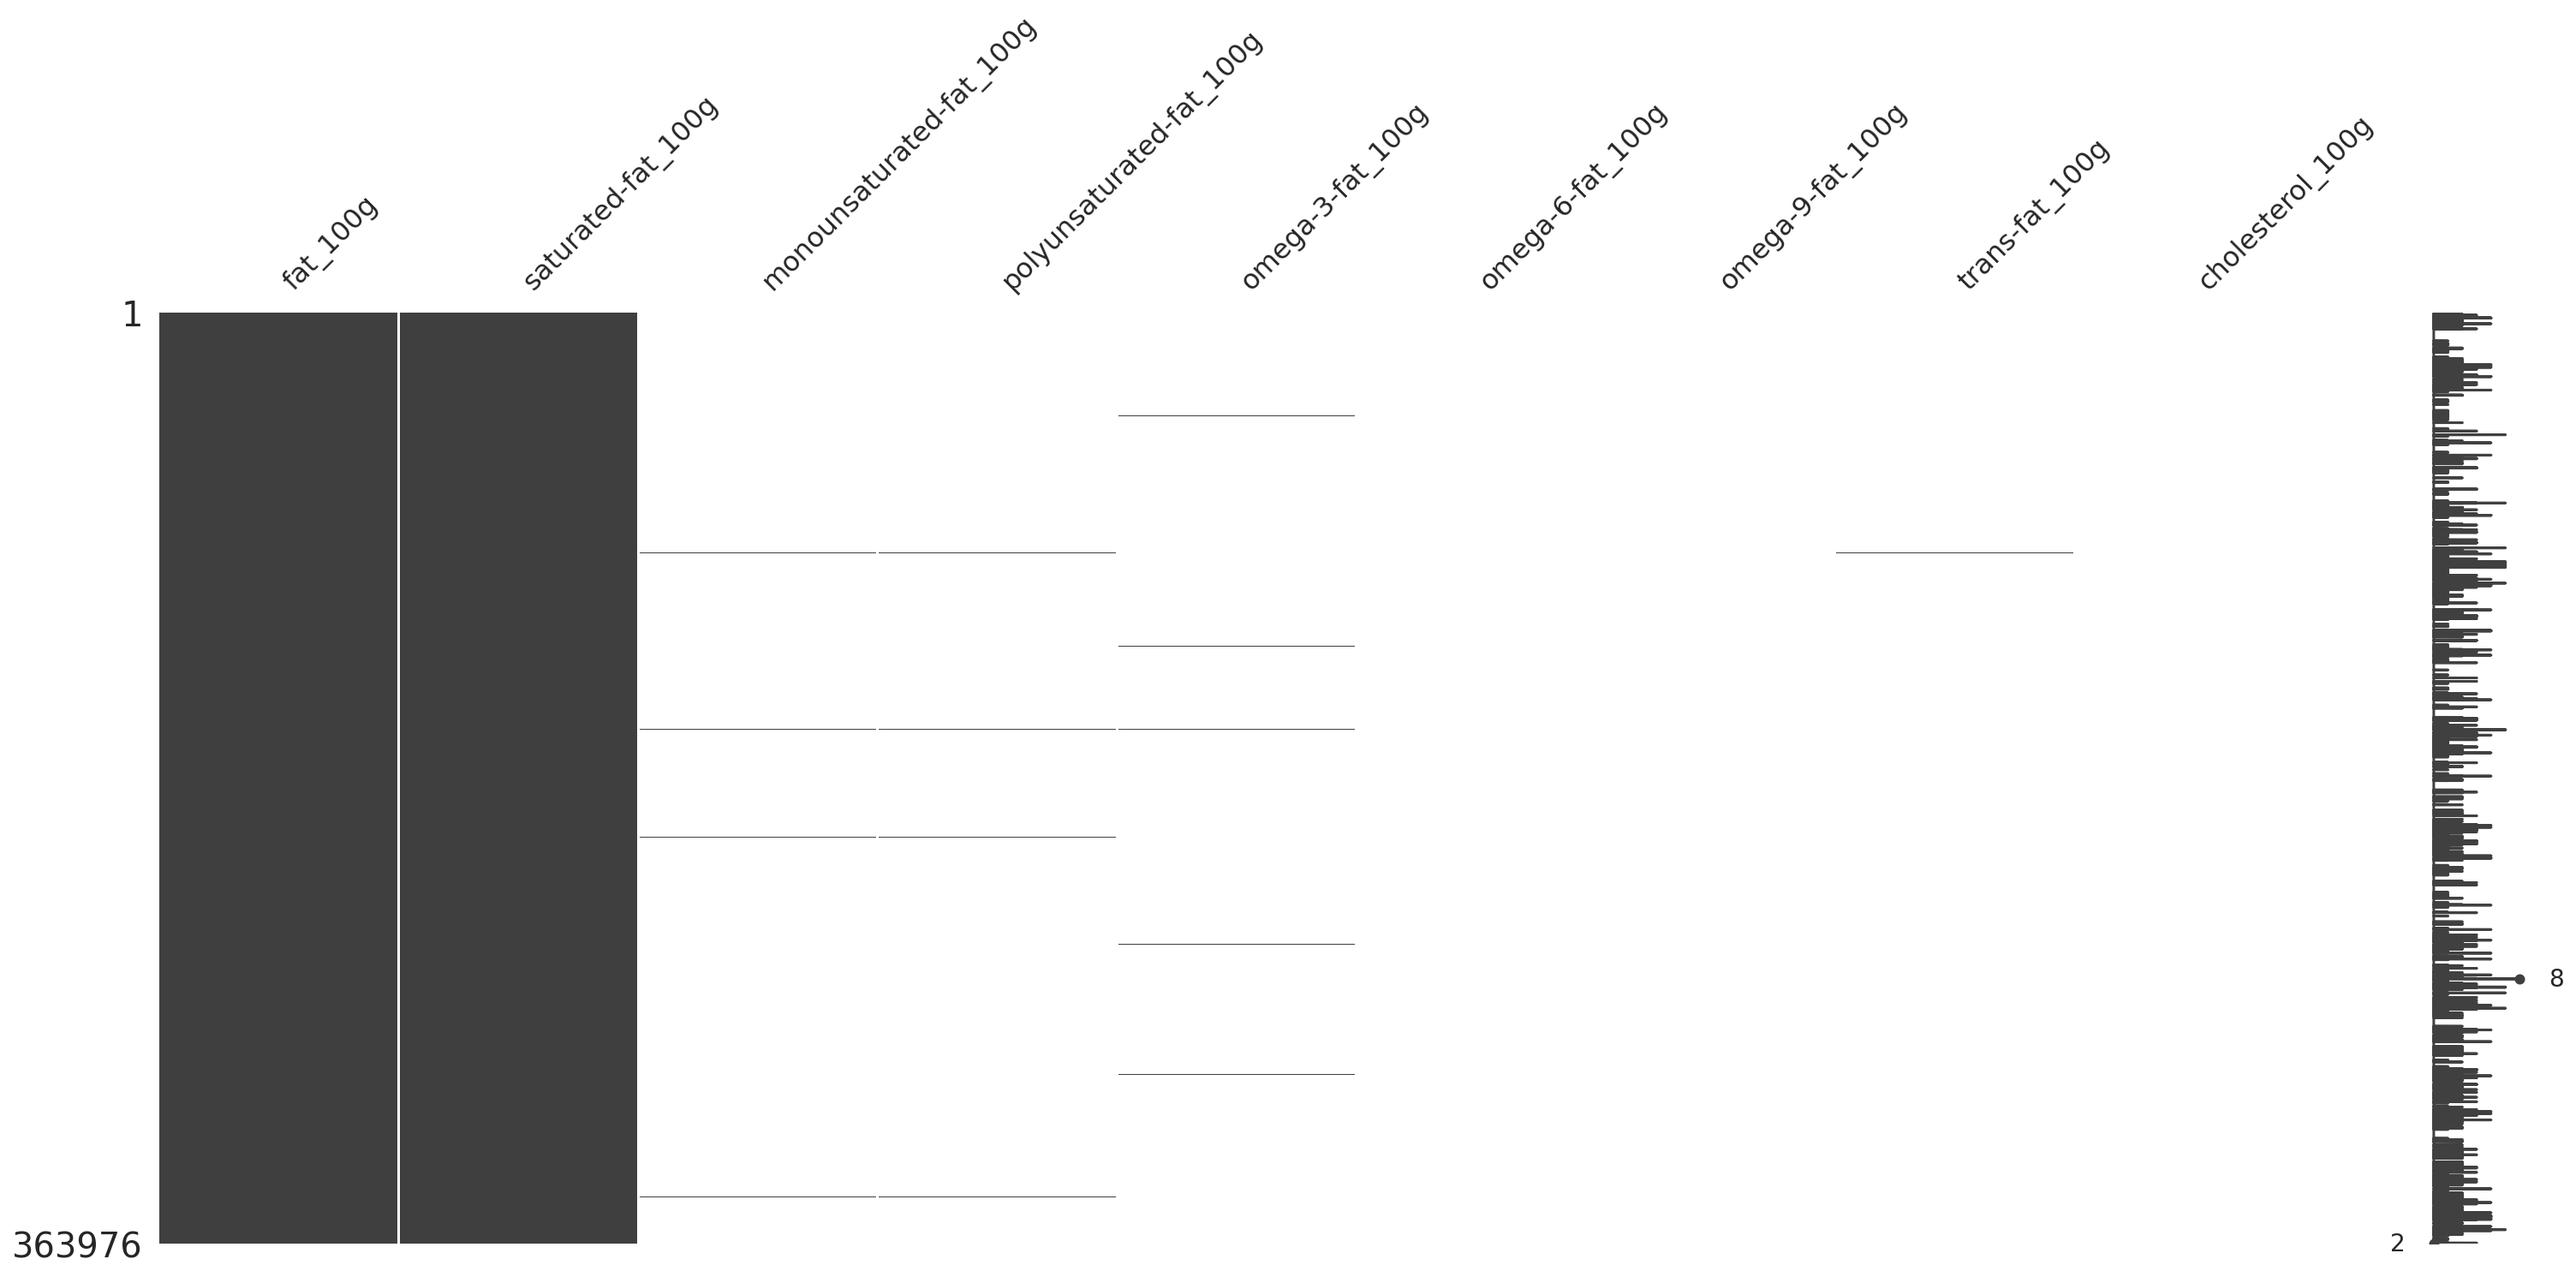

<Figure size 2088x1008 with 0 Axes>

In [58]:
msno.matrix(Nutri)
plt.yticks(rotation=0)
plt.figure (figsize=(29,14))

# **Dans notre cas la question des NaN ne peuvent pas être remplacés par une moyenne ou autre celà n'aurait aucun sens et les remplacer par 0 nous induirais en erreur, voudrait dire que le produit ne contient pas l'ingrédient.**

In [59]:
#les variables retenues
Var=(Nutri1.columns.values)
print(Var)


['fat_100g' 'saturated-fat_100g' 'monounsaturated-fat_100g'
 'polyunsaturated-fat_100g' 'omega-3-fat_100g' 'omega-6-fat_100g'
 'omega-9-fat_100g' 'trans-fat_100g' 'cholesterol_100g']


# **Variable retenues**

In [60]:
Nutri1

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g
1,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8.2,2.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3.0,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,0.3,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1895905,6.1,3.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1895906,27.0,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1895908,0.5,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1895913,20.2,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
Nutri1.describe()

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g
count,363976.000000,363976.000000,1380.000000,1409.000000,1041.000000,164.000000,13.000000,330.000000,335.000000
mean,13.388919,5.269172,21.139489,8.213140,2.589032,9.067331,29.666577,0.242686,0.121368
std,16.185686,7.701982,24.381481,11.218018,4.248957,10.904617,20.073996,0.840065,1.438004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005500,0.000000,0.000000
25%,1.000000,0.200000,2.600000,1.700000,0.477000,1.100000,27.000000,0.000000,0.000000
50%,7.400000,2.000000,9.500000,4.000000,1.700000,5.250000,31.000000,0.000000,0.000000
75%,21.600000,7.600000,28.000000,9.700000,3.000000,15.000000,32.000000,0.200000,0.011750
max,99.980000,99.900000,82.200000,69.000000,60.000000,58.000000,64.000000,12.000000,24.000000


En effet la mesure est Xg pour 100g, donc au moins les valeurs au dessus de 100 doivent êtres supprimées

Recherche des valeurs éronnées

---



Petit problème, souvent nous avons la vleurs en graisse totale, donc qui ne doit pas être comptée avec les autres graisses et le sucre total (hydrates de carbone) idem, donc nous les gardons à part.

Il est en fait très dificille d'immaginer le degré d'incertitude de cette base de donnée qui repose sur le bénévola.
Par exemple Wikipedia est beaucoup plus robuste car très surveillée @ divers niveaux

EXEMPLE D'UN TRUC BIEN MAUVAIS

Prince Chocolat - Lu - 300 g

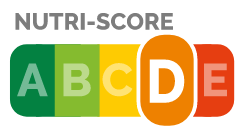

→ Les ingrédients sont listés par ordre d'importance (quantité).

Liste des ingrédients:
céréales 50,7% (farine de blé 35%, farine de blé complète 15,7%), sucre, huiles végétales (palme, colza), cacao maigre en poudre 4,5%, sirop de glucose, amidon de blé, poudre à lever (carbonate acide d'ammonium, carbonate acide de sodium, diphpsphate disodique), émulsifiant (lécithine de soja, lécithine de tournesol), sel, lait écrémé en poudre, lactose et protéines de lait, arômes.
Substances ou produits provoquant des allergies ou intolérances : Œufs, Gluten, Lait, Soja

Traces éventuelles : Œufs

Repères nutritionnels pour 100 g 
 17 g Matières grasses / Lipides en quantité modérée
 5.6 g Acides gras saturés en quantité élevée
 32 g Sucres en quantité élevée
 0.58 g Sel en quantité modérée
Taille d'une portion : 20g

In [62]:
Nutri2=Nutri1.copy()

In [63]:
# Vérifier si le fichier existe ou non
print('sauvegarde sur drive sous Nutri2')
if os.path.isfile('drive/MyDrive/P3/data/Nutri2.csv'):
    print("Fichier Nutri2 trouvé dans drive, effacement.")
    os.remove('drive/MyDrive/P3/data/Nutri2.csv')
    print('sauvegarde sur drive')
    Nutri2.to_csv('drive/MyDrive/P3/data/Nutri2.csv', index = False)



else:
    
    #Sauvegarde de Nutri1 en fichier .csv sur google drive
    Nutri2.to_csv('drive/MyDrive/P3/data/Nutri2.csv', index = False)
print('Fichier Nutri2 sauvegarde sous ; drive/MyDrive/P3/data/Nutri2.csv')

sauvegarde sur drive sous Nutri2
Fichier Nutri2 trouvé dans drive, effacement.
sauvegarde sur drive
Fichier Nutri2 sauvegarde sous ; drive/MyDrive/P3/data/Nutri2.csv
